In [2]:
from os import listdir
import collections
import sound_processing_functions as sndprcfunc
import numpy as np
import matplotlib.pyplot as plt

# signal processing
from scipy.io import wavfile
from scipy.signal import lfilter
from scipy.fftpack import fft

% matplotlib inline

# select a group of tracks to analyze

In [3]:
genre_ex = "Breaks"


breaks_tracks_WAV = '/home/markhyphen/tracks/breaks/'
filenames_wav_breaks = [breaks_tracks_WAV + f for f in listdir(breaks_tracks_WAV)]

breaks_tracks_WAV = '/home/markhyphen/tracks/dnb/'
filenames_wav_dnb = [breaks_tracks_WAV + f for f in listdir(breaks_tracks_WAV)]

breaks_tracks_WAV = '/home/markhyphen/tracks/house/'
filenames_wav_house = [breaks_tracks_WAV + f for f in listdir(breaks_tracks_WAV)]

breaks_tracks_WAV = '/home/markhyphen/tracks/hiphop/'
filenames_wav_hiphop = [breaks_tracks_WAV + f for f in listdir(breaks_tracks_WAV)]


# initialize music collection
sound_files = collections.defaultdict(dict)

### change ###
sound_files["Breaks"]["path"] = filenames_wav_breaks

sound_files["DnB_jungle"]["path"] = filenames_wav_dnb

sound_files["Hip_Hop"]["path"] = filenames_wav_house

sound_files["House"]["path"] = filenames_wav_hiphop

# load sound files
for genre in sound_files.keys():
    samplerate_temp = []
    wavedata_temp = []
    num_of_samp_temp = []
    song_length_temp = []
    for current in sound_files[genre]["path"]:
        samplerate, wavedata_ = wavfile.read(current)
        samplerate_temp.append(samplerate)
        wavedata_temp.append(wavedata_)
        num_of_samp_temp.append(wavedata_.shape[0])
        song_length_temp.append(int(wavedata_.shape[0] / samplerate))      # round up
    sound_files[genre]["samplerate"] = samplerate_temp
    sound_files[genre]["wavedata"] = wavedata_temp
    sound_files[genre]["number_of_samples"] = num_of_samp_temp
    sound_files[genre]["song_length"] = song_length_temp

# The Time Domain

# an example of one of the tracks in folder

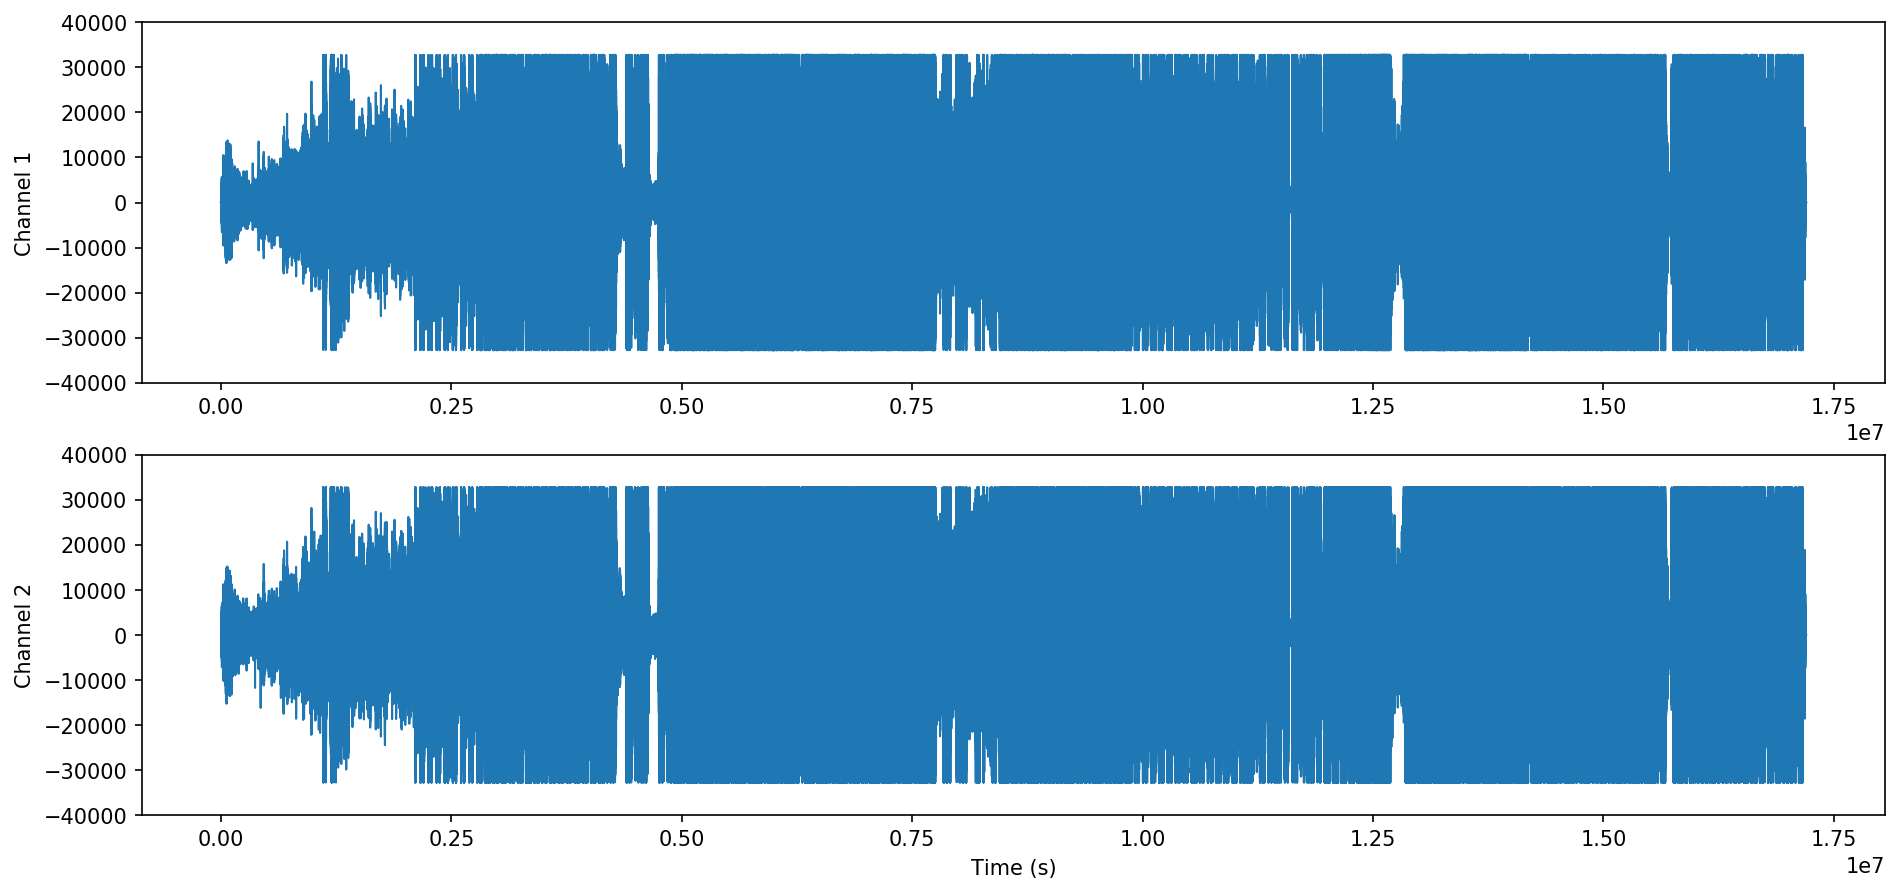

In [4]:
sndprcfunc.show_stereo_waveform(sound_files[genre_ex]["wavedata"][0])

# The Frequency Domain

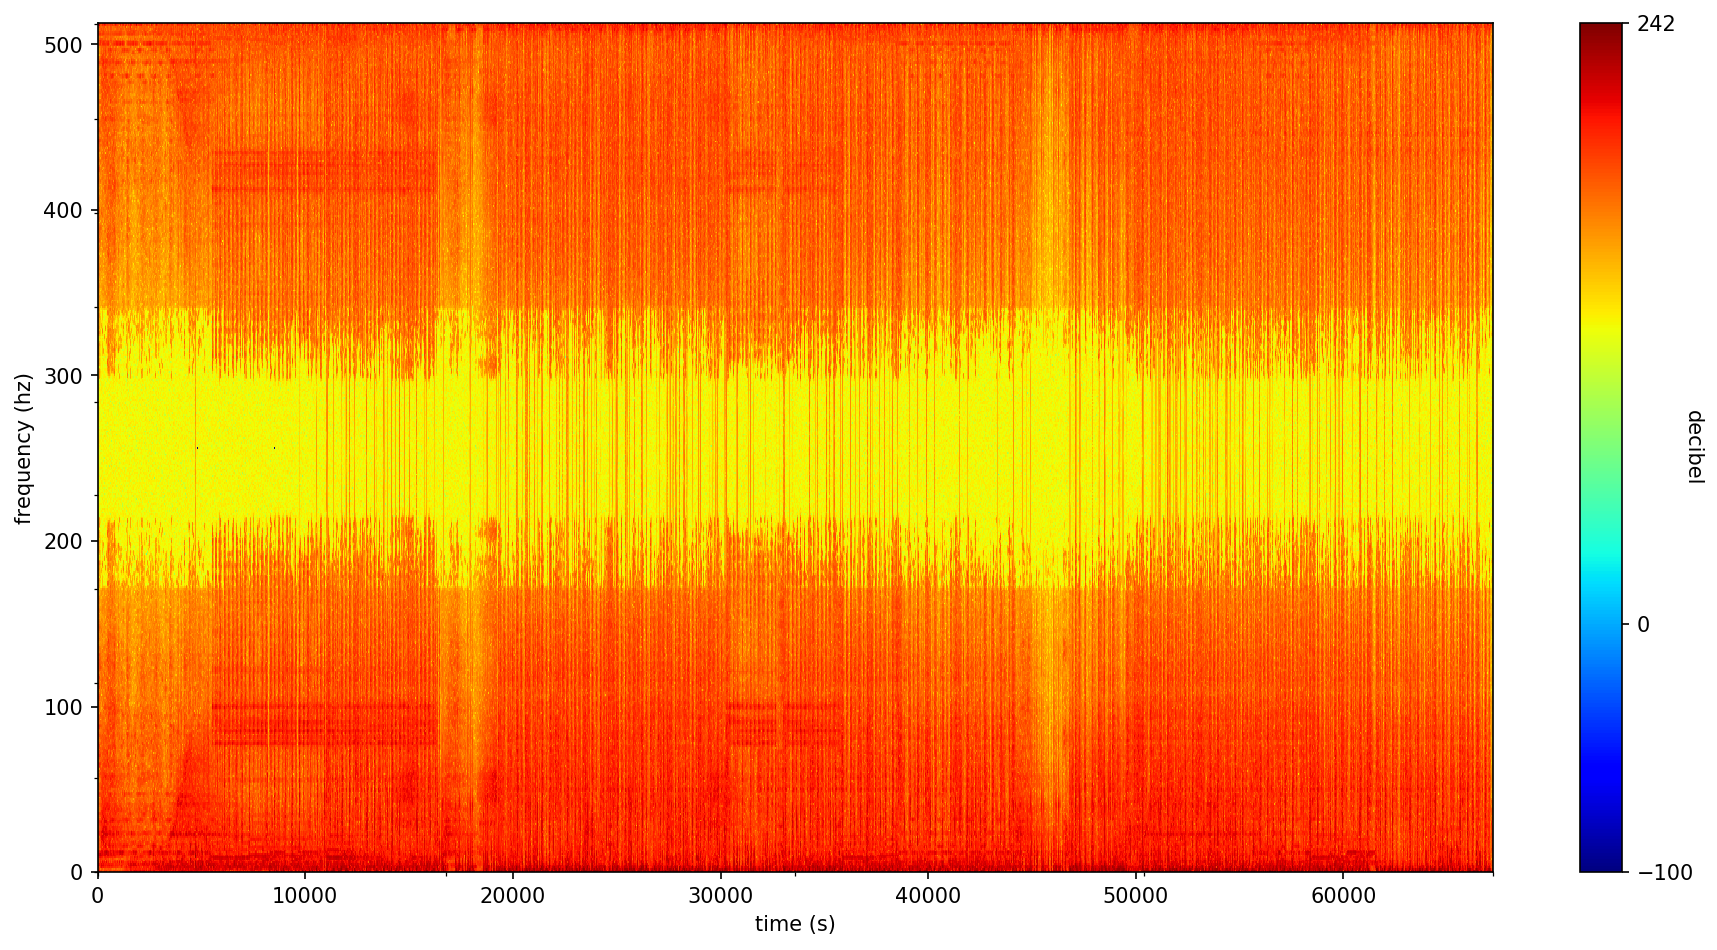

(array([     0.,  16796.,  33592.,  50388.,  67184.], dtype=float32),
 ['0.01', '89.59', '179.17', '268.75', '358.33'],
 67185)

In [5]:
sndprcfunc.plotstft(sound_files[genre_ex]["wavedata"][0], sound_files[genre_ex]["samplerate"][0])

# Some pre-processing

In [6]:
for genre in sound_files.keys():
    for i, current in enumerate(sound_files[genre]["wavedata"]):
        if current.shape[1] > 1:
            # use combine the channels by calculating their geometric mean
            sound_files[genre]["wavedata"][i] = np.mean(current, axis=1)

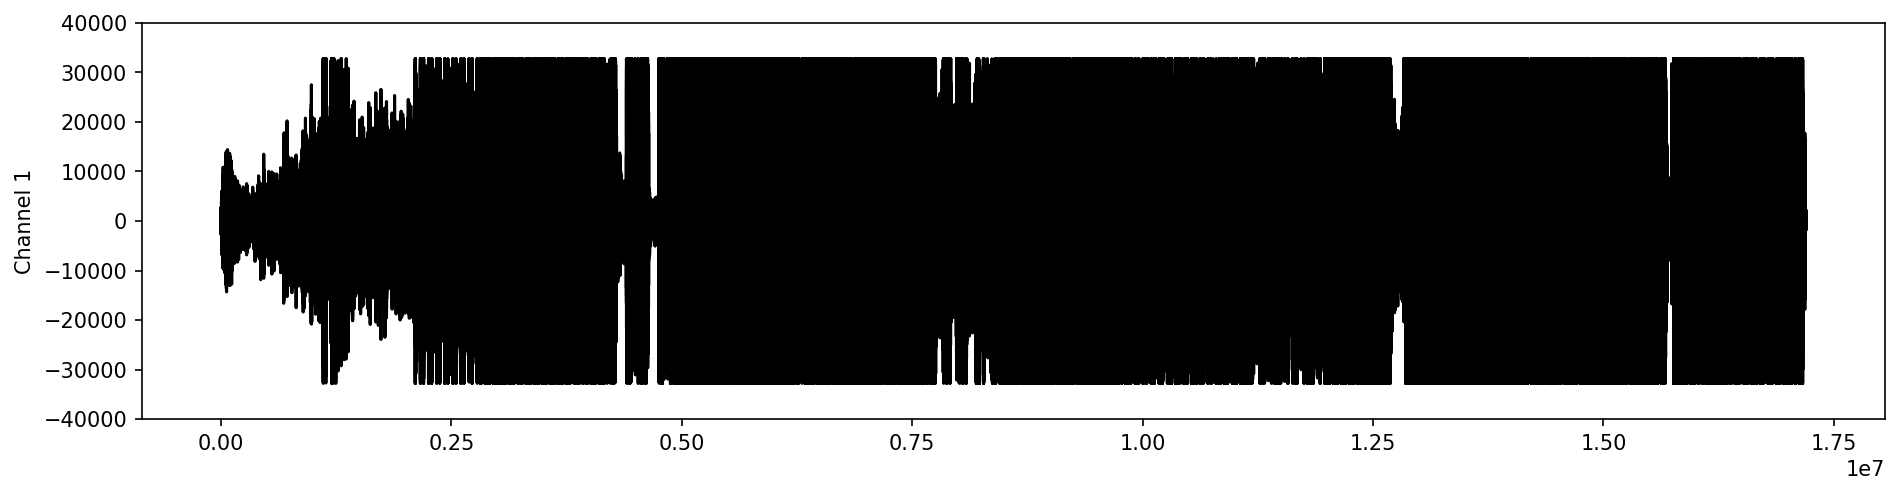

In [7]:
sndprcfunc.show_mono_waveform(sound_files[genre_ex]["wavedata"][0])

# zero-crossing-rate

In [8]:
zcr, ts = sndprcfunc.zero_crossing_rate(sound_files[genre_ex]["wavedata"][0], 2048, sound_files[genre_ex]["samplerate"][0])

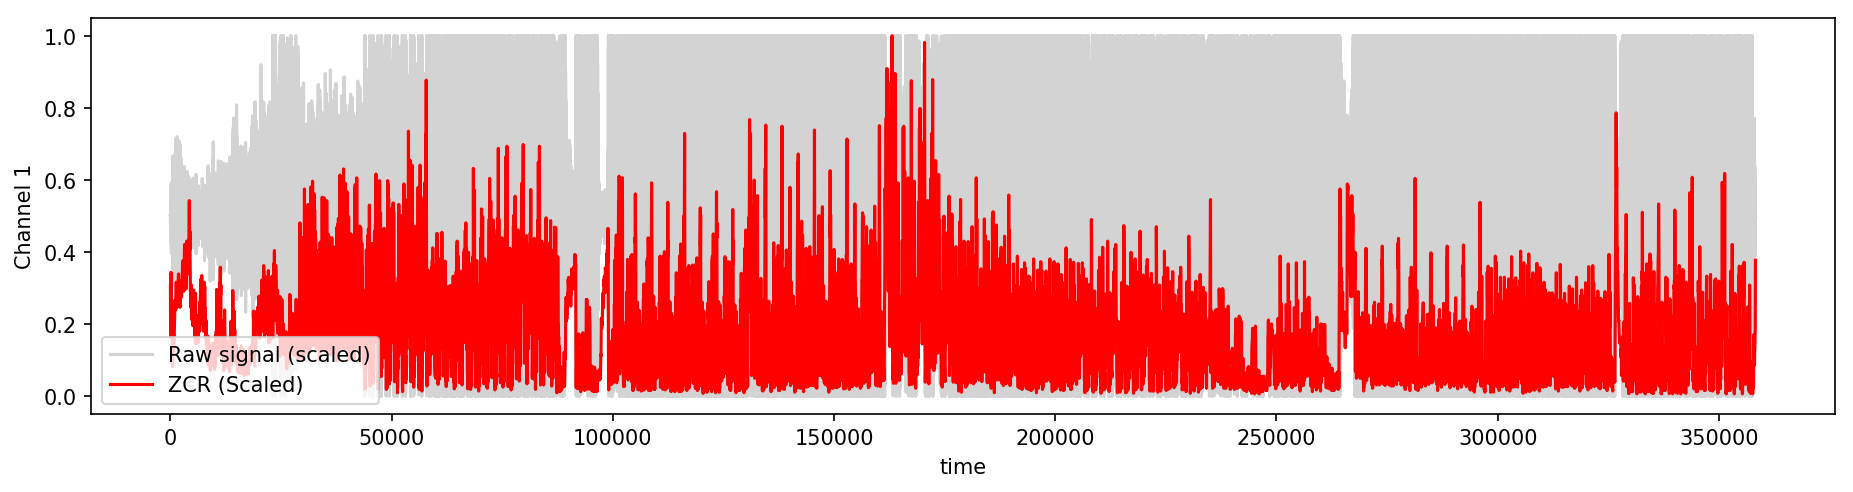

In [9]:
sndprcfunc.show_feature_superimposed(sound_files, 0, genre_ex, zcr, ts, 'ZCR (Scaled)')

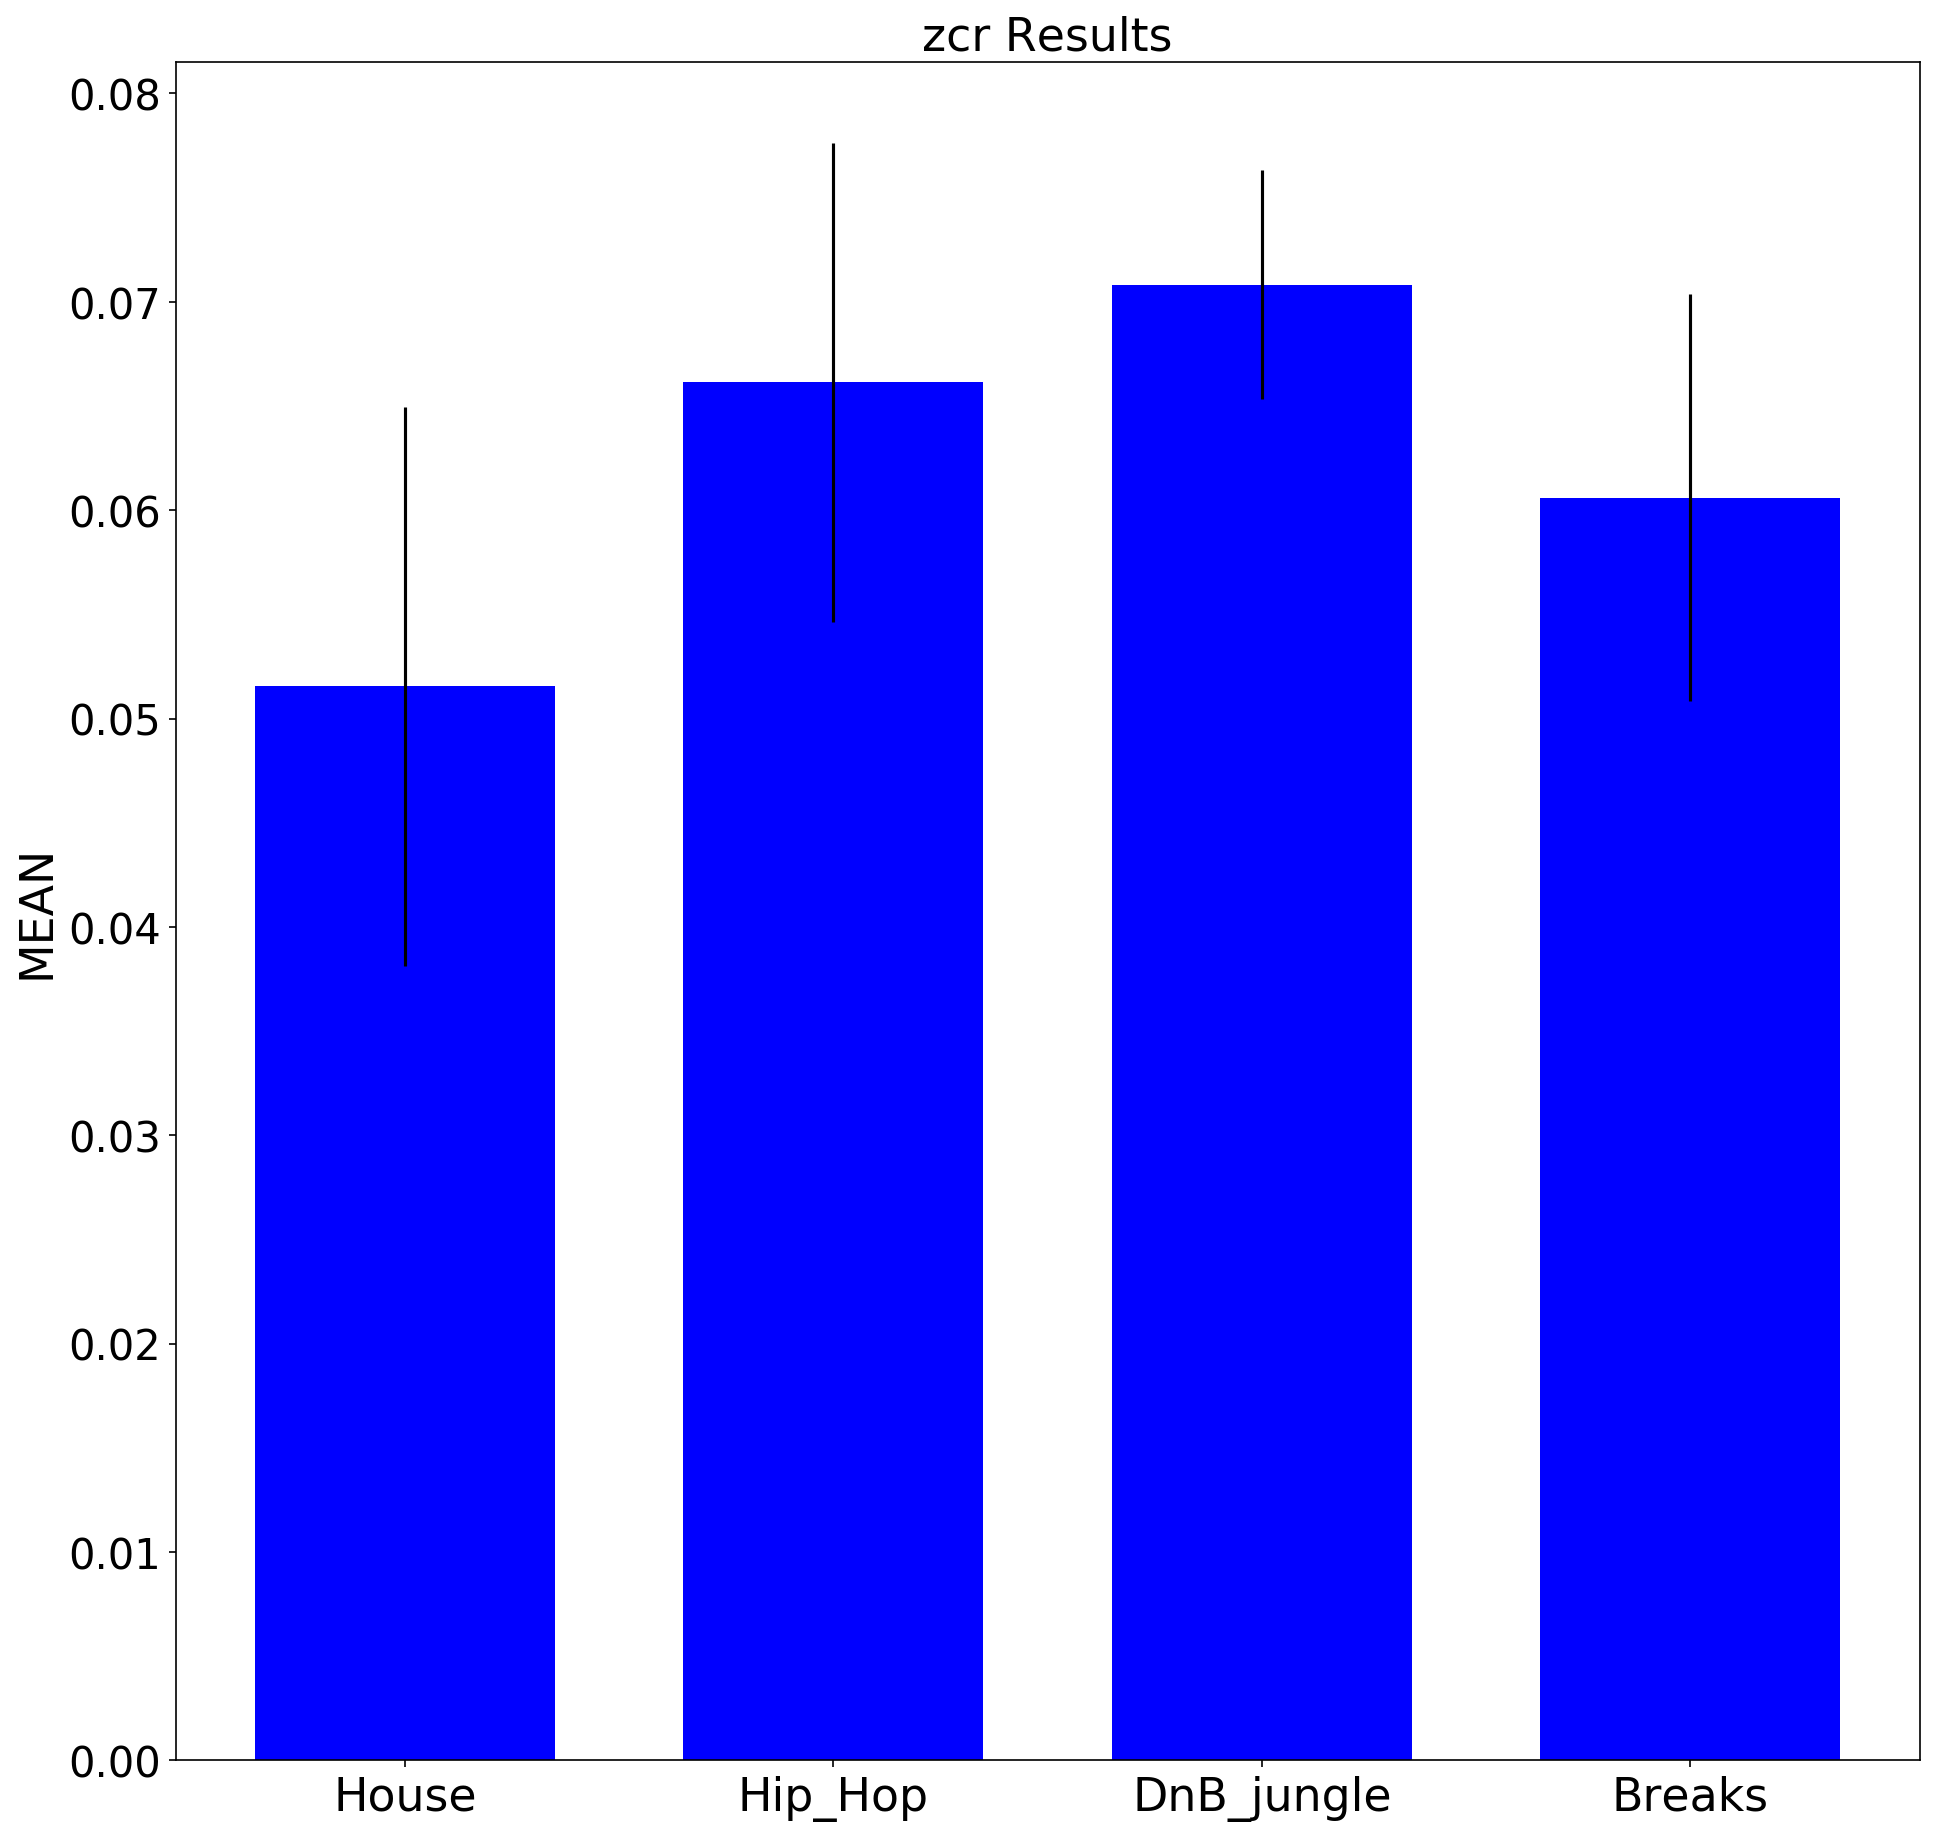

In [10]:
# calculate ZCR for all tracks
for genre in sound_files.keys():
    zcr_temp = []
    for i in range(0, len(sound_files[genre]["wavedata"])):
        zcr_temp.append(sndprcfunc.zero_crossing_rate(sound_files[genre]["wavedata"][i], 2048, sound_files[genre]["samplerate"][i], False))
    sound_files[genre]["zcr"] = zcr_temp

sndprcfunc.plot_comparison(sound_files, "zcr")

# RMS - root mean square

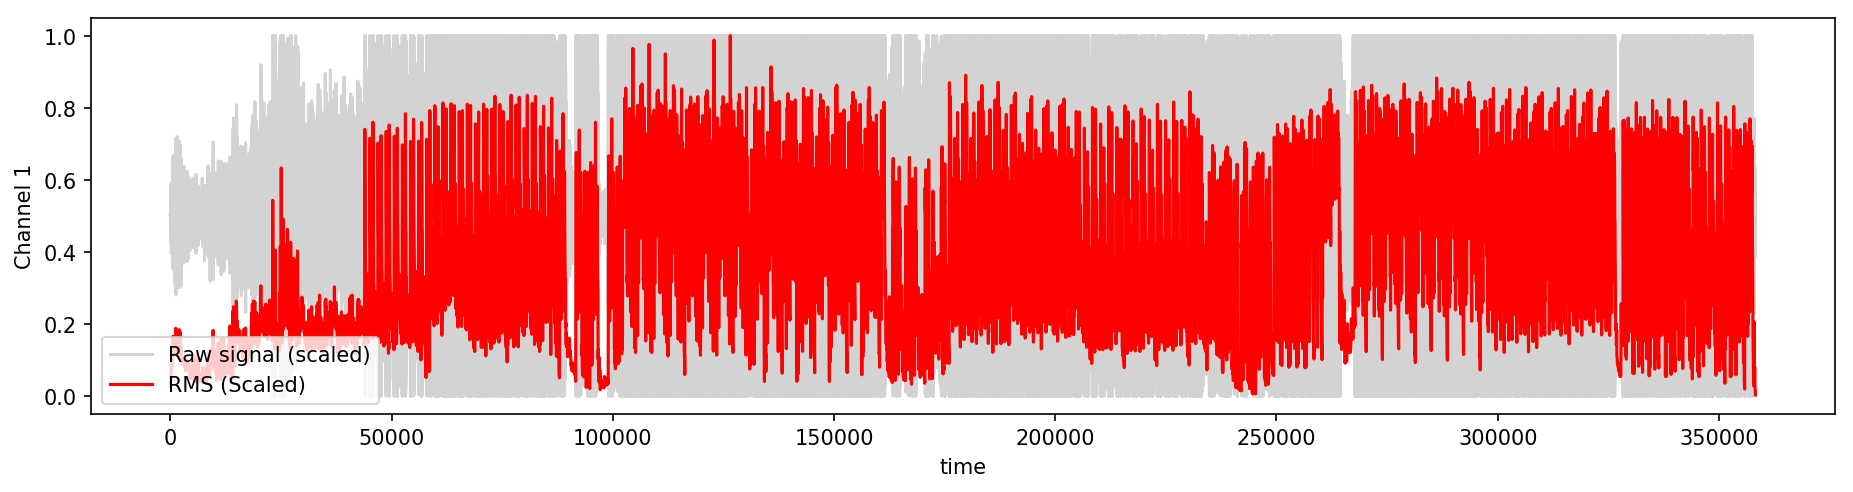

In [11]:
rms, ts = sndprcfunc.root_mean_square(sound_files[genre_ex]["wavedata"][0], 2048, sound_files[genre_ex]["samplerate"][0]);
sndprcfunc.show_feature_superimposed(sound_files, 0, genre_ex, rms, ts, 'RMS (Scaled)', squared_wf=False);

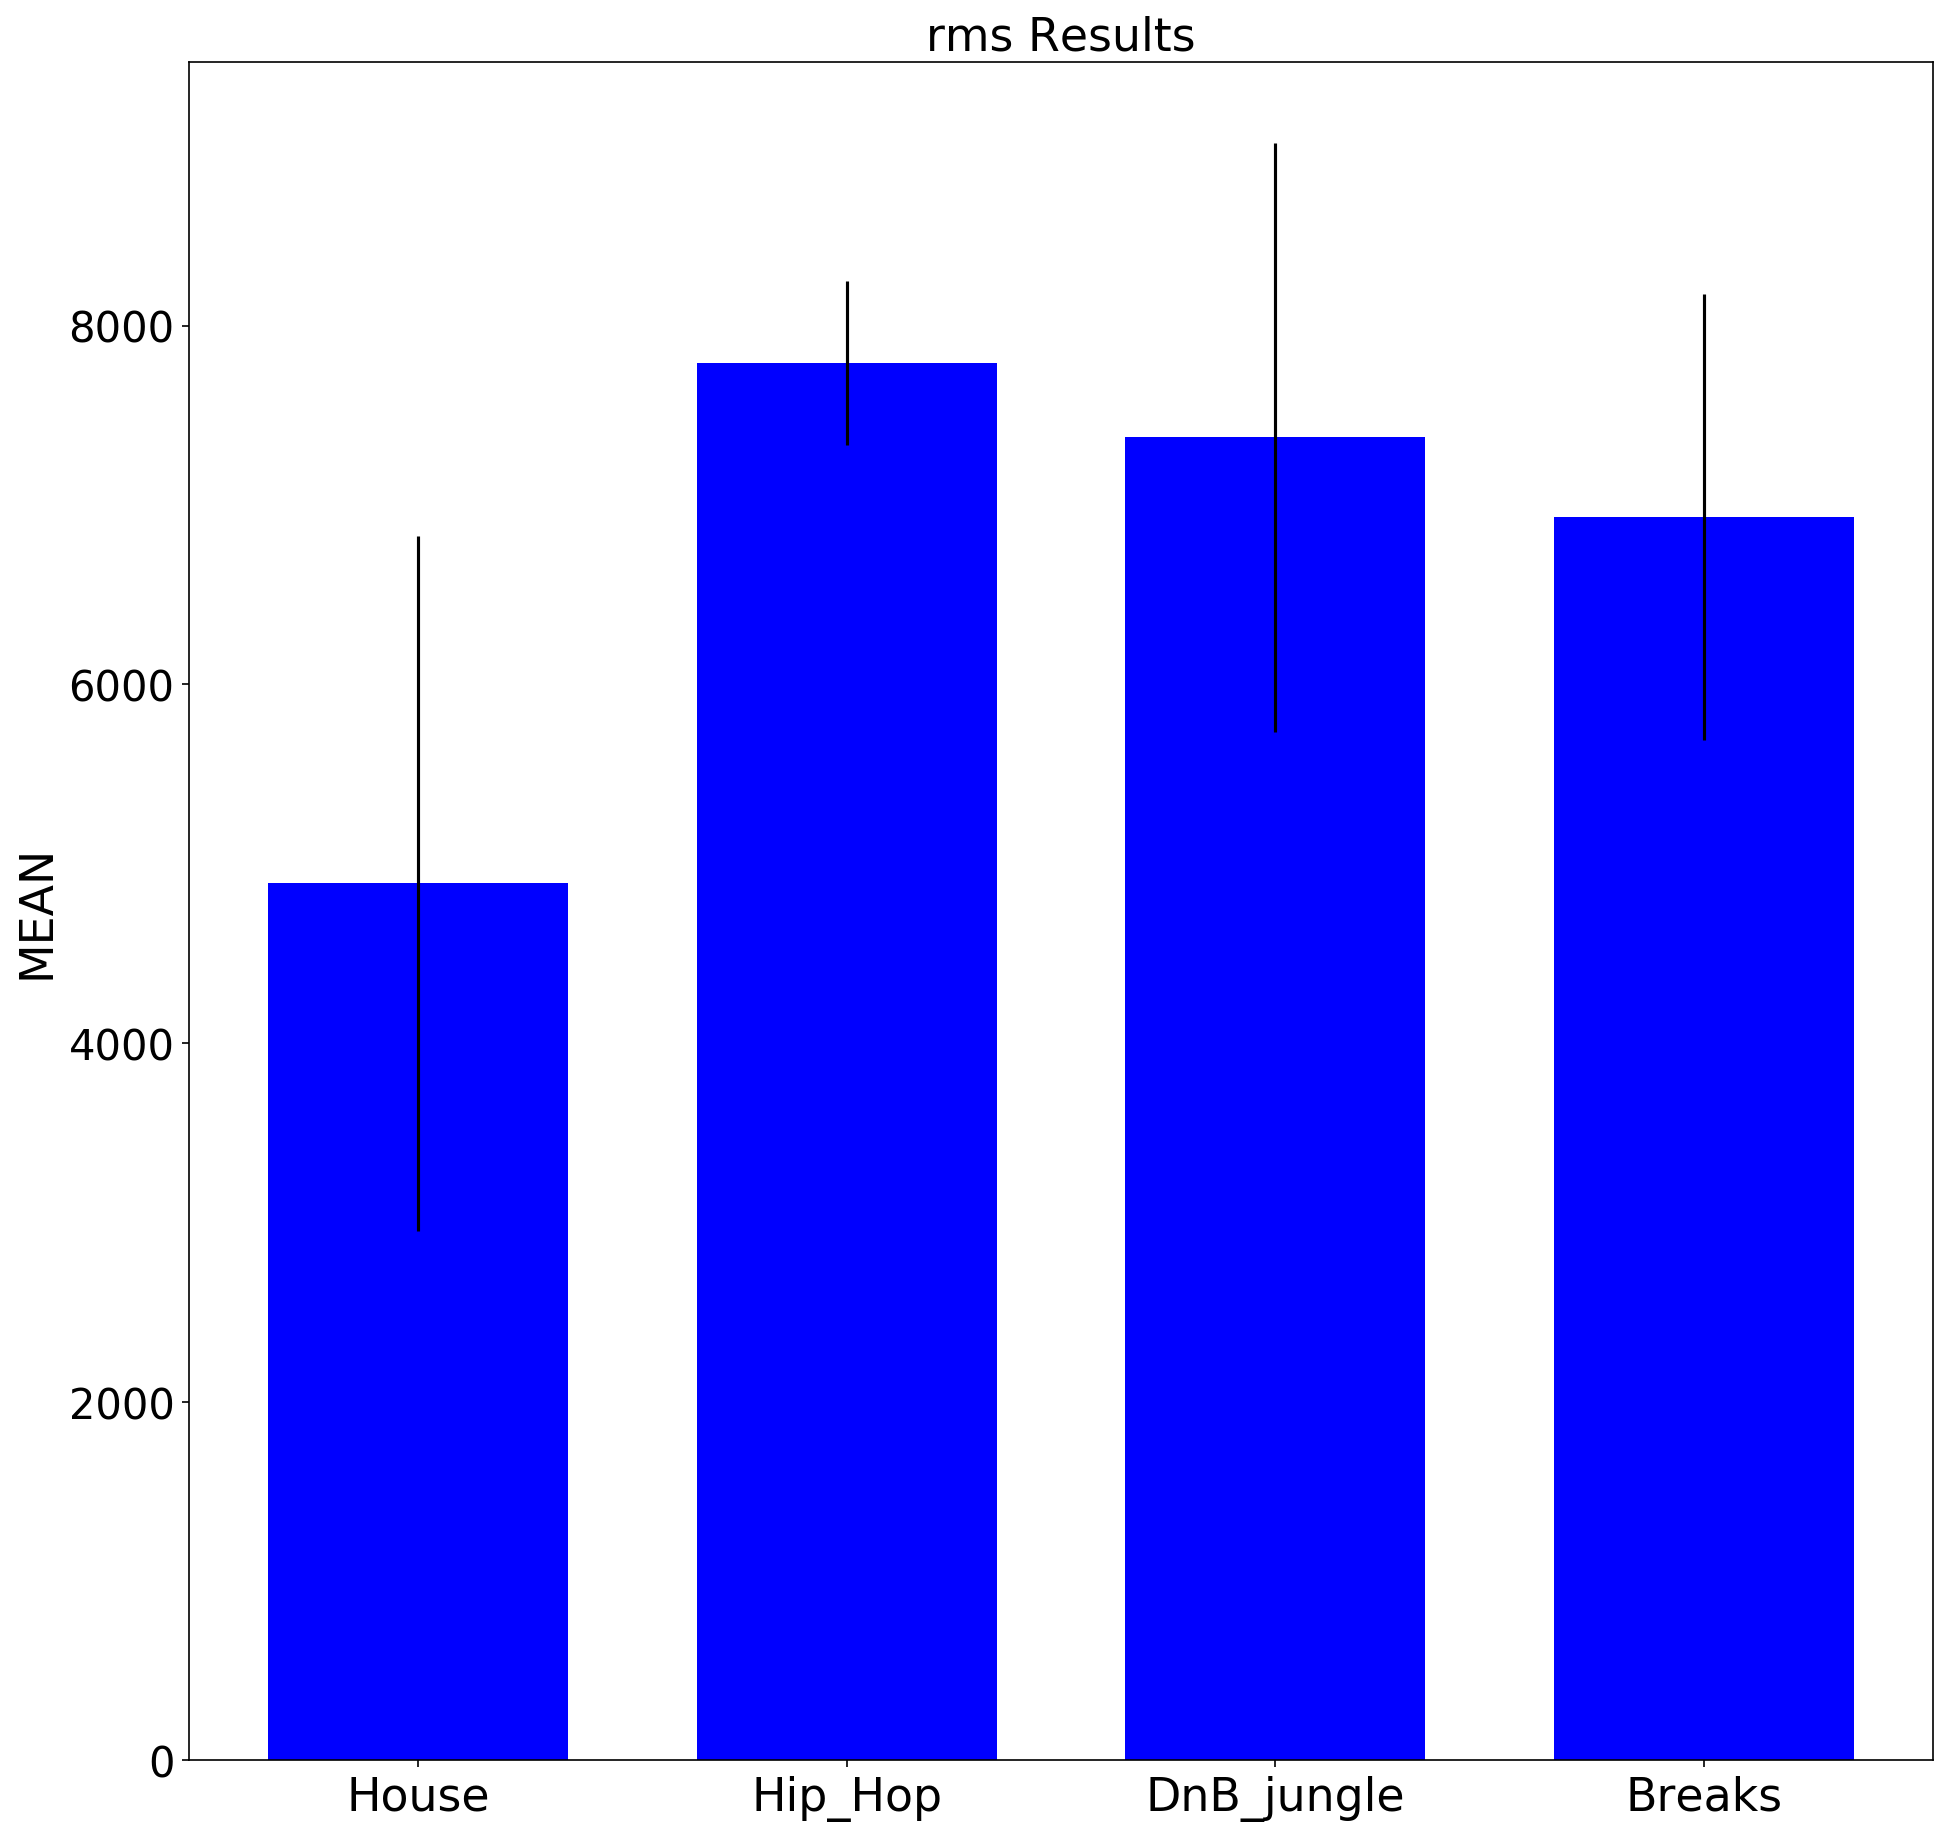

In [12]:
# calculate root mean square for the collection
for genre in sound_files.keys():
    rms_temp = []
    for i in range(0, len(sound_files[genre]["wavedata"])):
        rms_temp.append(sndprcfunc.root_mean_square(sound_files[genre]["wavedata"][i], 2048, sound_files[genre]["samplerate"][i], False))
    sound_files[genre]["rms"] = rms_temp
sndprcfunc.plot_comparison(sound_files, "rms")

# Spectral Features

# Spectral Centroid

/home/markhyphen/Dropbox/DS_Work-Dropbox/GH_Repos/Metis_projects/Music_Genre_Classification-Metis_Project_3_McNulty/sound_processing_functions.py:242: RuntimeWarning: invalid value encountered in double_scalars
  sc_t = np.sum(power_spectrum * np.arange(1, freqbins + 1)) / np.sum(power_spectrum)


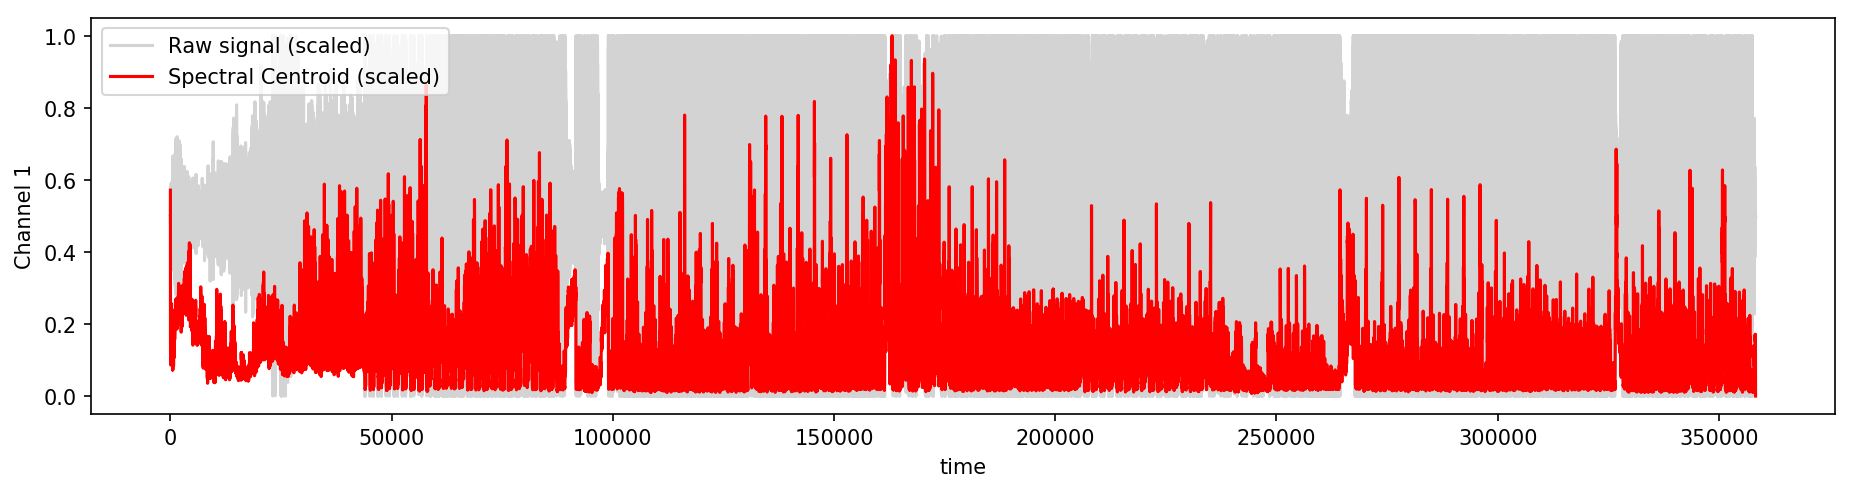

In [13]:
sc, ts = sndprcfunc.spectral_centroid(sound_files[genre_ex]["wavedata"][0], 1024, sound_files[genre_ex]["samplerate"][0])
sndprcfunc.show_feature_superimposed(sound_files, 0, genre_ex, sc, ts, 'Spectral Centroid (scaled)', squared_wf=False);

/home/markhyphen/Dropbox/DS_Work-Dropbox/GH_Repos/Metis_projects/Music_Genre_Classification-Metis_Project_3_McNulty/sound_processing_functions.py:242: RuntimeWarning: invalid value encountered in double_scalars
  sc_t = np.sum(power_spectrum * np.arange(1, freqbins + 1)) / np.sum(power_spectrum)


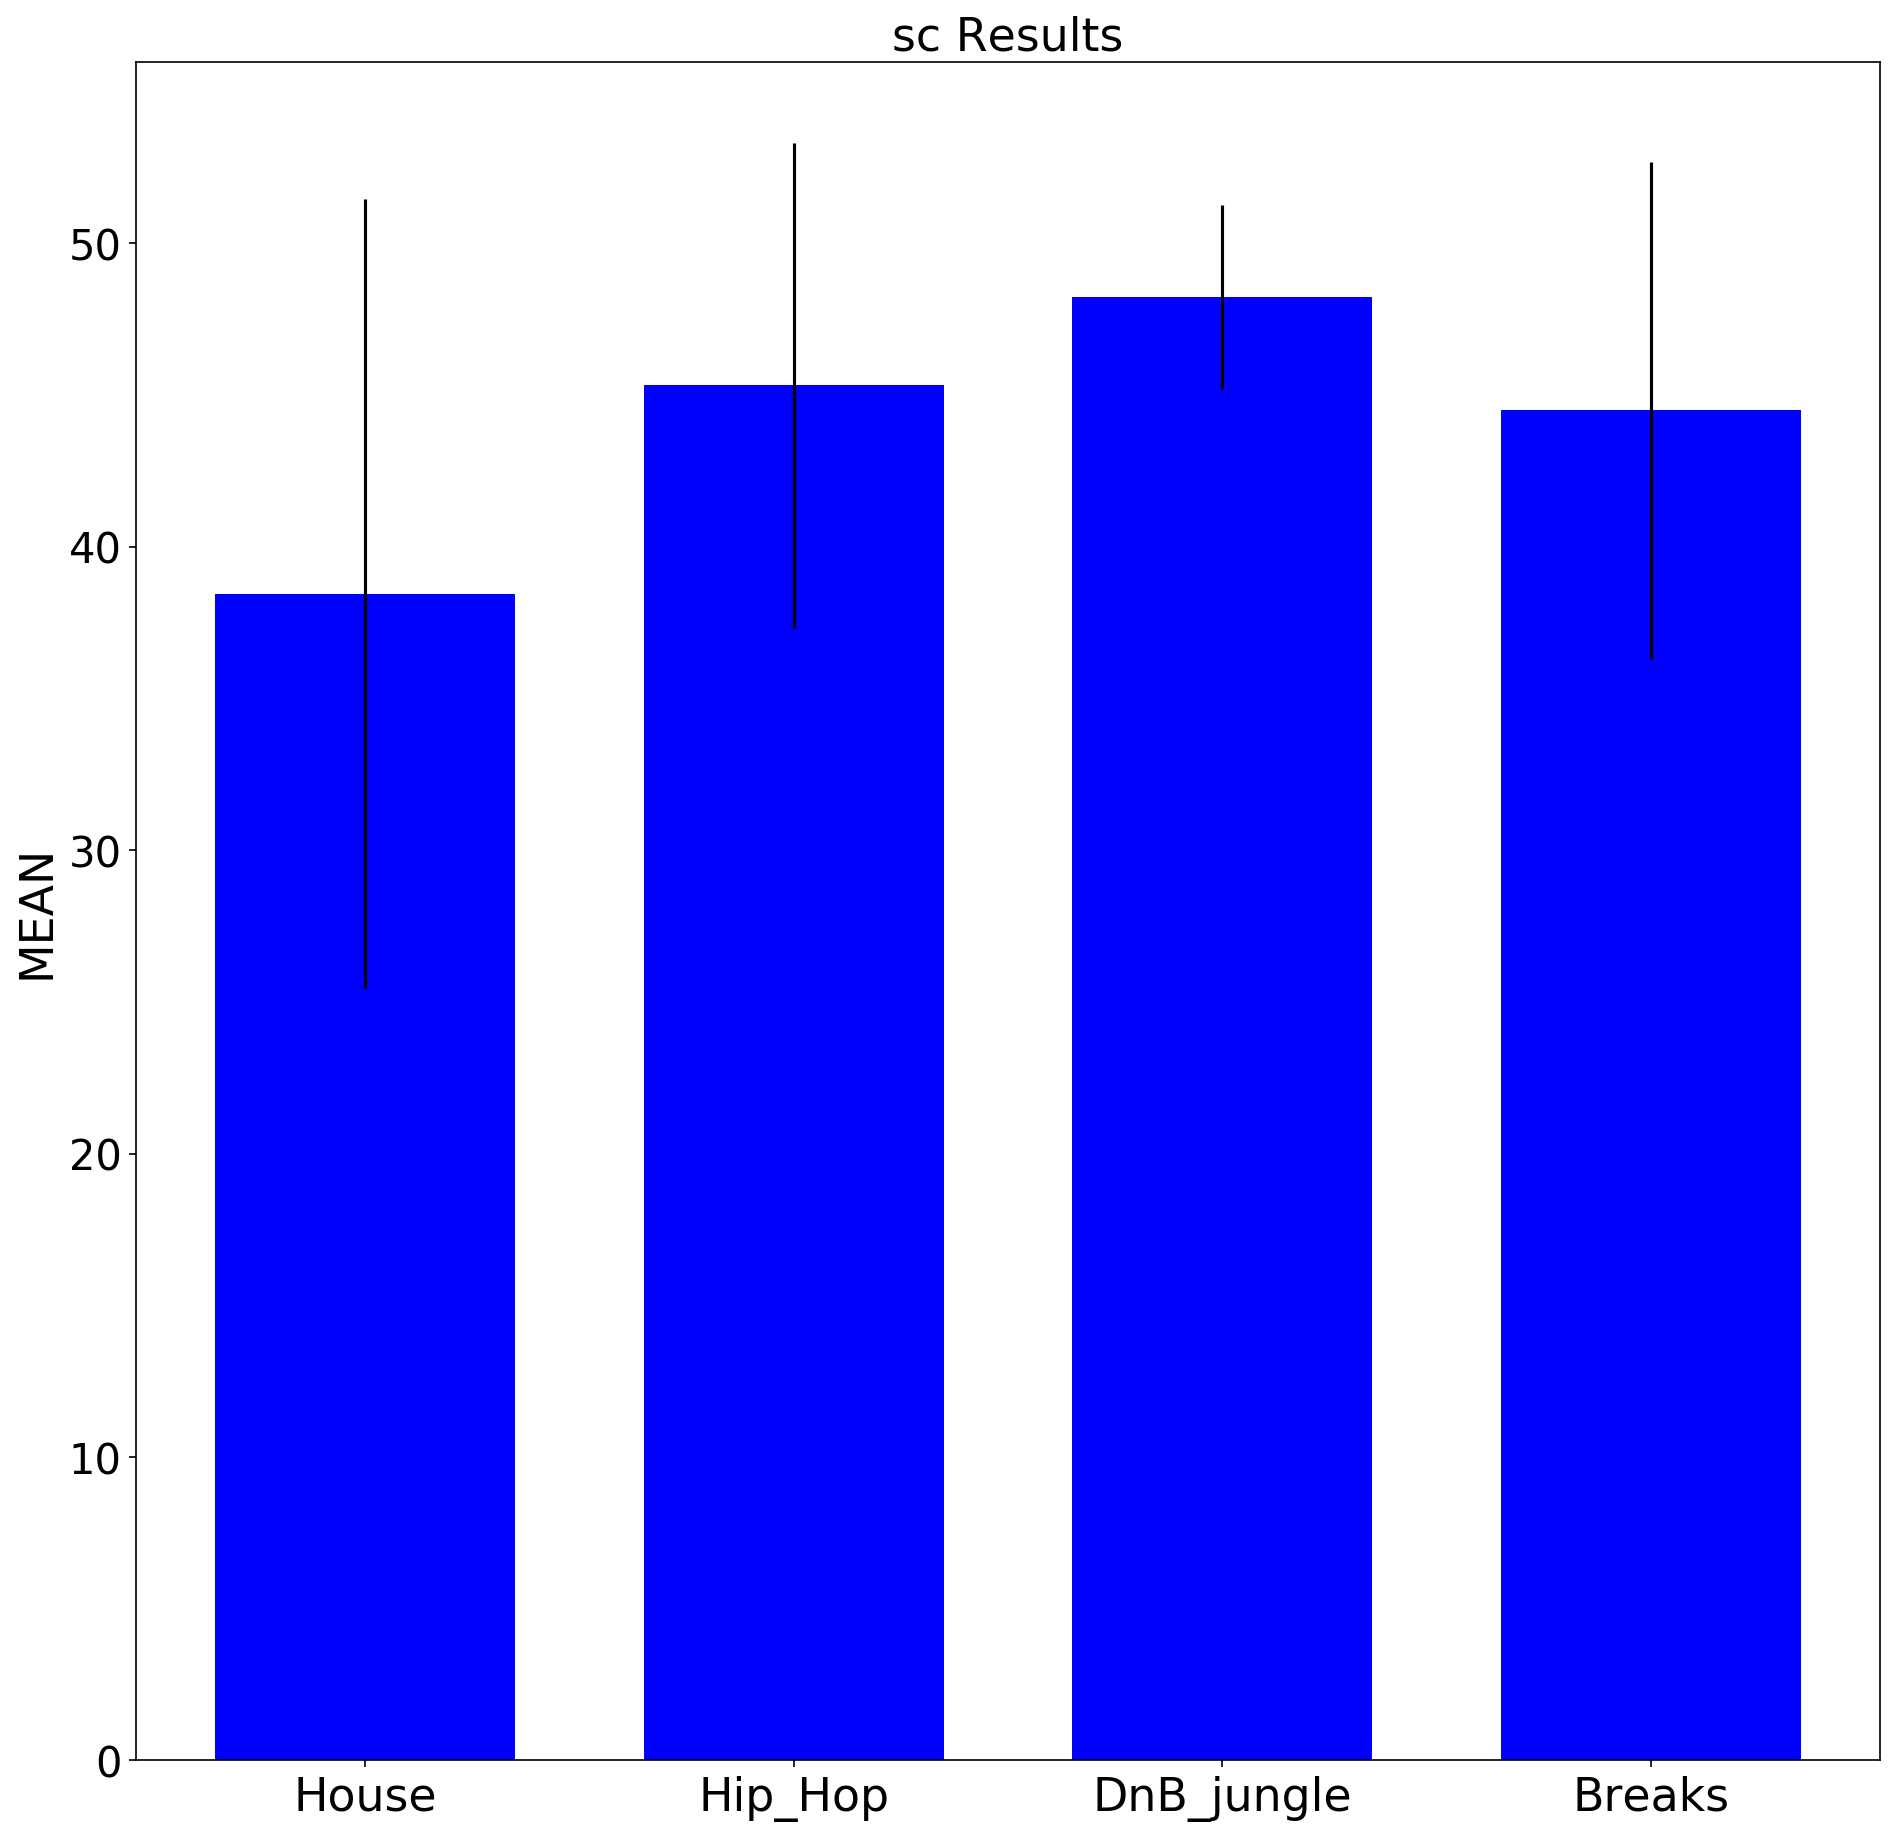

In [14]:
# calculate Spectral Centroid for the collection
for genre in sound_files.keys():
    sc_temp = []
    for i in range(0, len(sound_files[genre]["wavedata"])):
        sc_temp.append(sndprcfunc.spectral_centroid(sound_files[genre]["wavedata"][i], 2048, sound_files[genre]["samplerate"][i], False))
    sound_files[genre]["sc"] = sc_temp

sndprcfunc.plot_comparison(sound_files, "sc")

# spectral rolloff

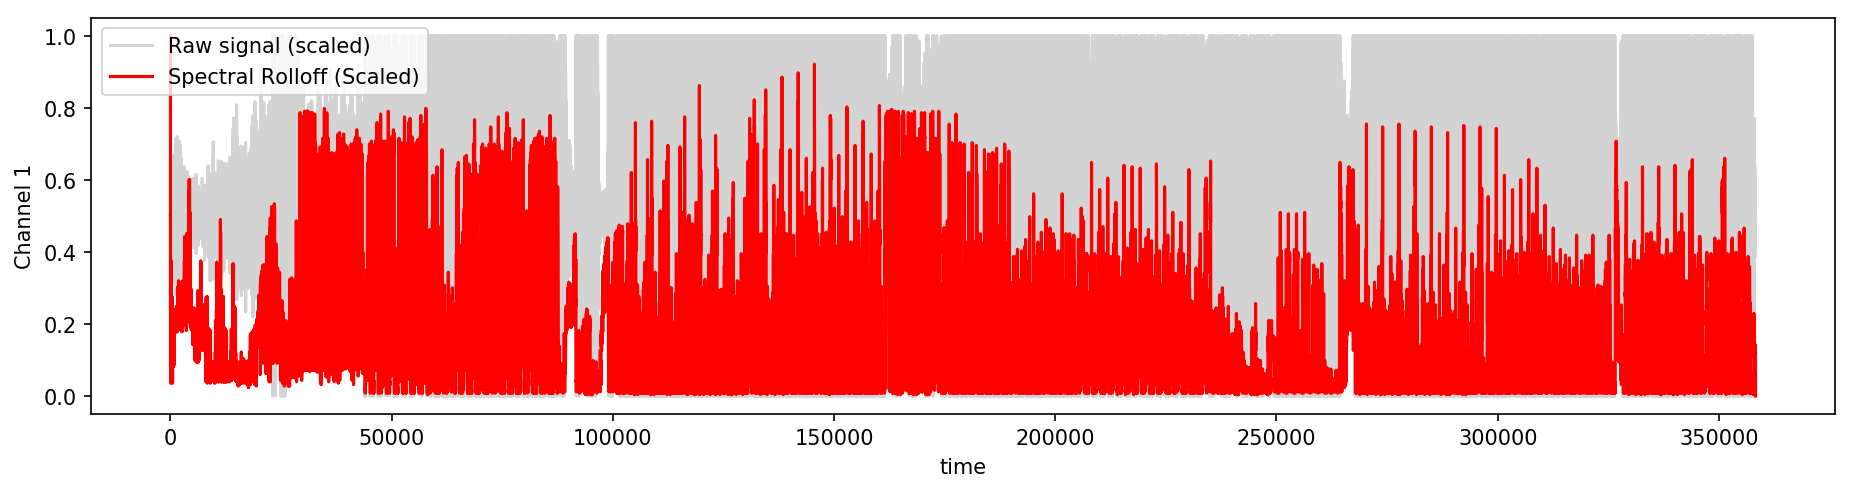

In [15]:
sr, ts = sndprcfunc.spectral_rolloff(sound_files[genre_ex]["wavedata"][0], 1024, sound_files[genre_ex]["samplerate"][0], k=0.85)
sndprcfunc.show_feature_superimposed(sound_files, 0, genre_ex, sr, ts, 'Spectral Rolloff (Scaled)', squared_wf=False);

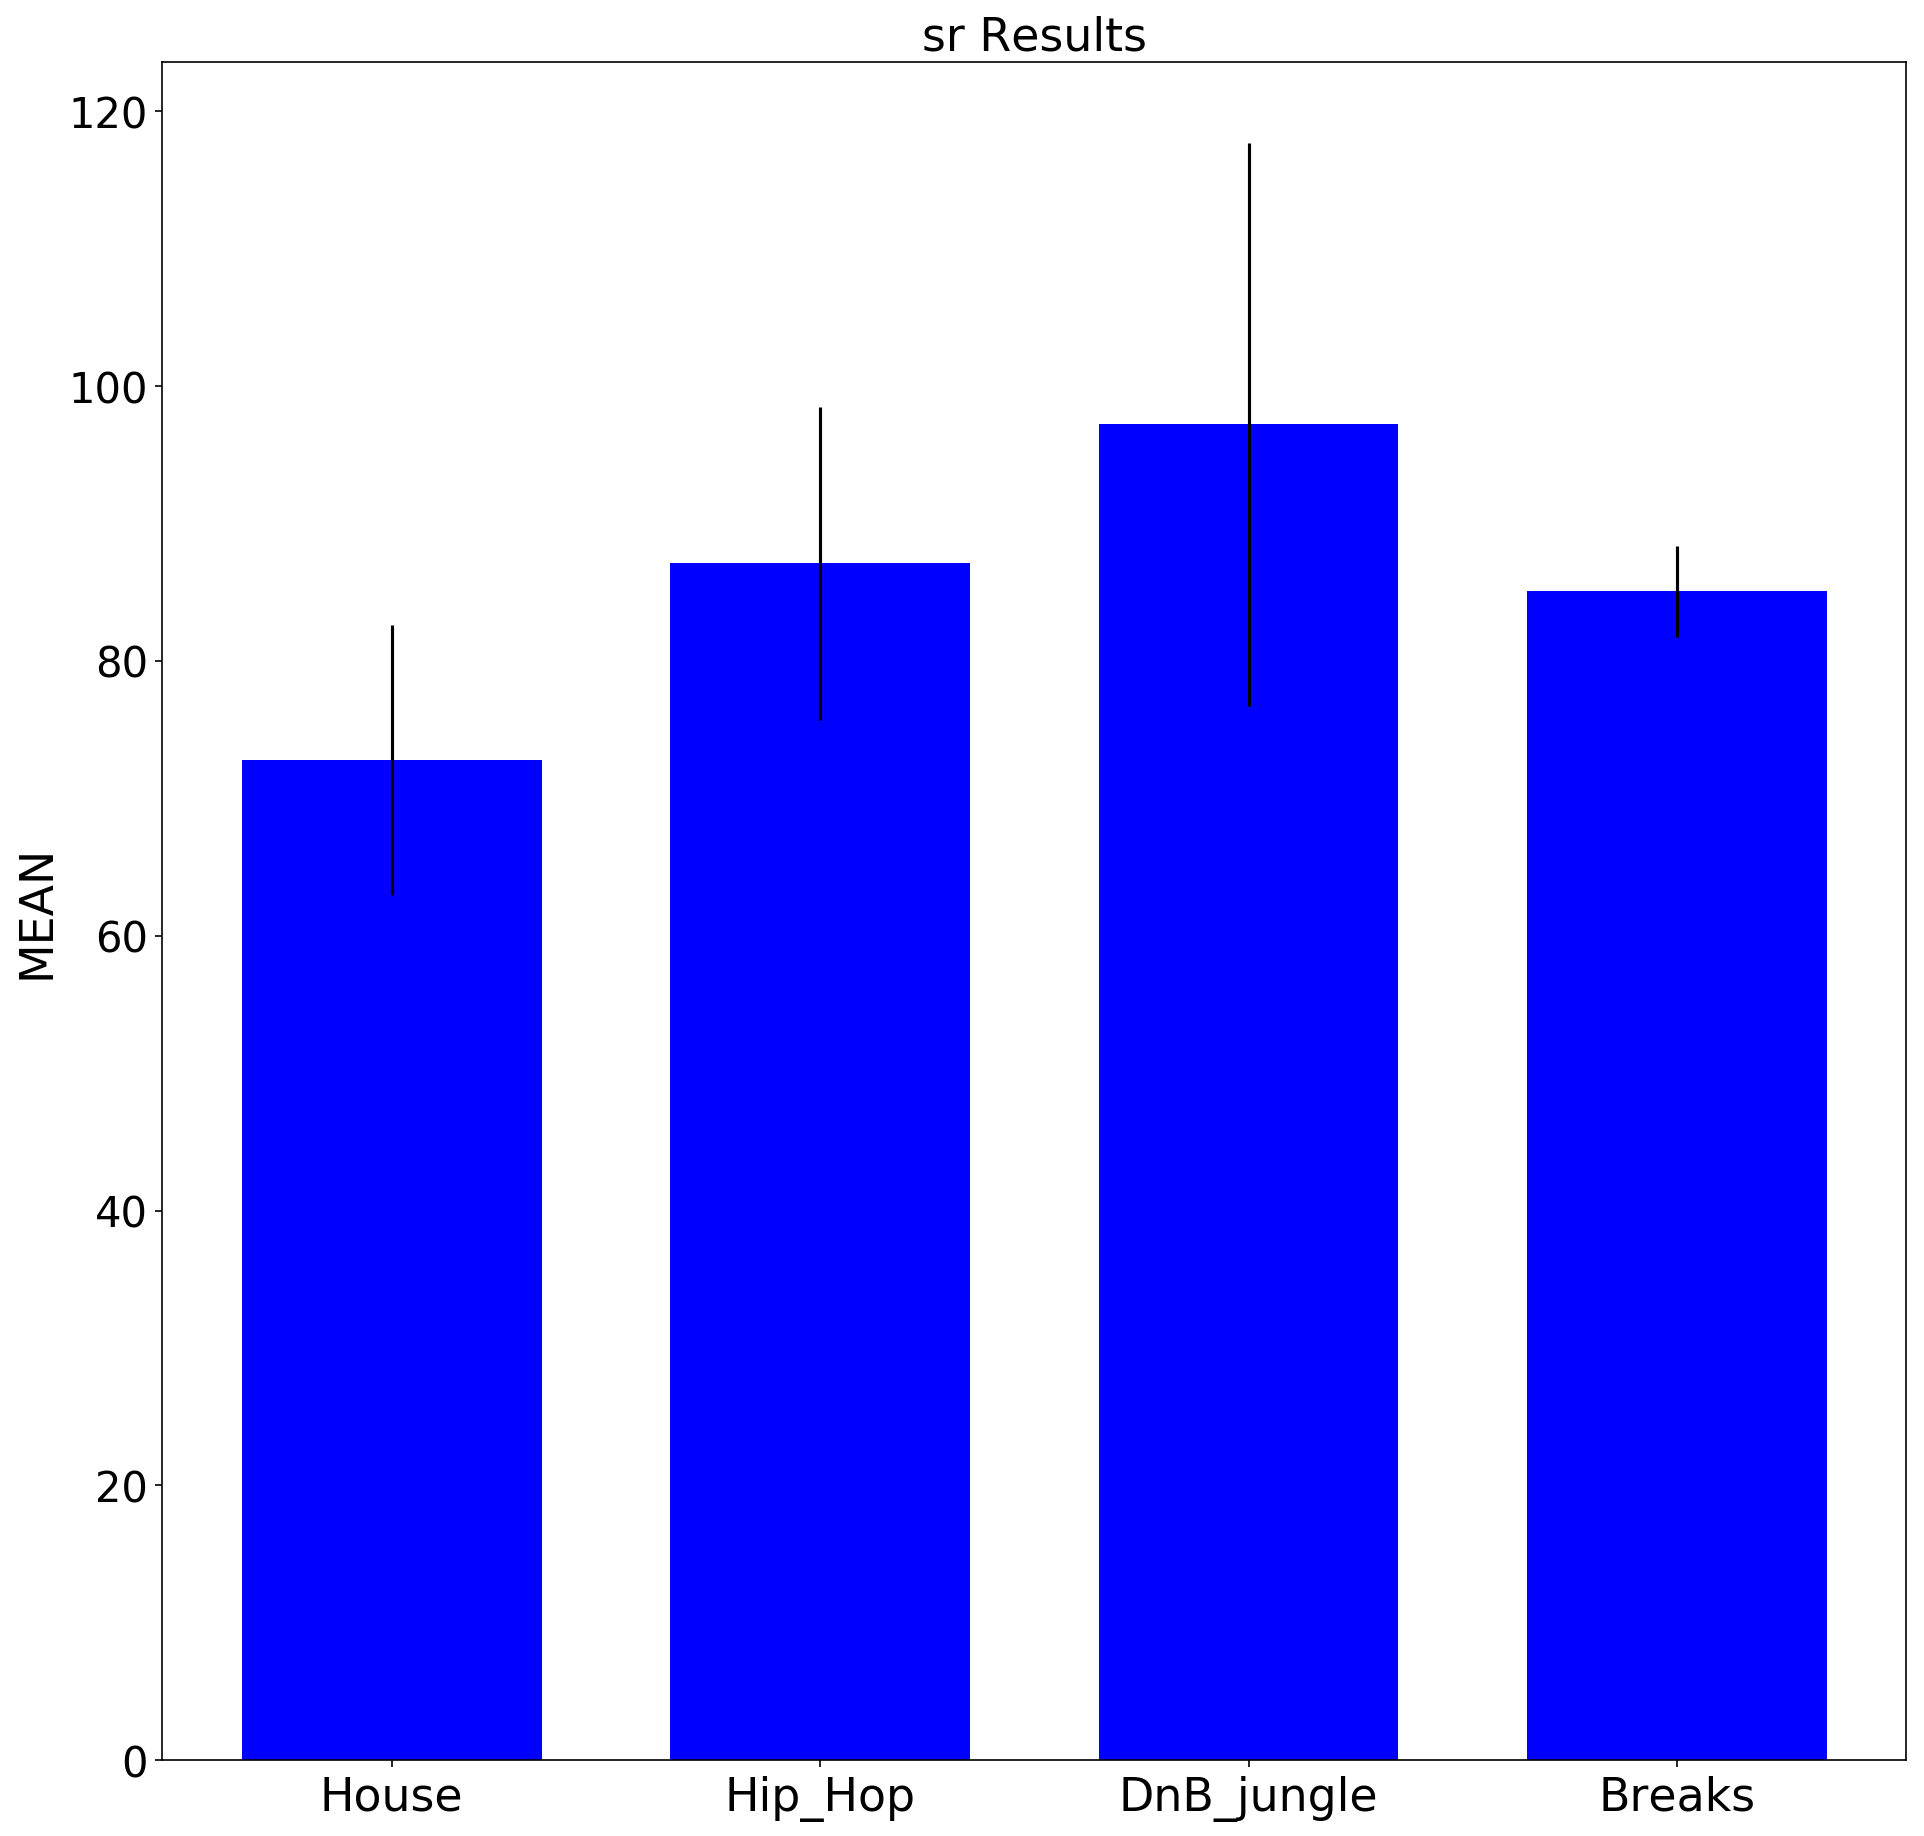

In [16]:
# calculate Spectral Rolloff for the collection
for genre in sound_files.keys():
    sr_temp = []
    for i in range(0, len(sound_files[genre]["wavedata"])):
        sr_temp.append(sndprcfunc.spectral_rolloff(sound_files[genre]["wavedata"][i], 2048, sound_files[genre]["samplerate"][i], False))
    sound_files[genre]["sr"] = sr_temp

sndprcfunc.plot_comparison(sound_files, "sr")


# Spectral flux

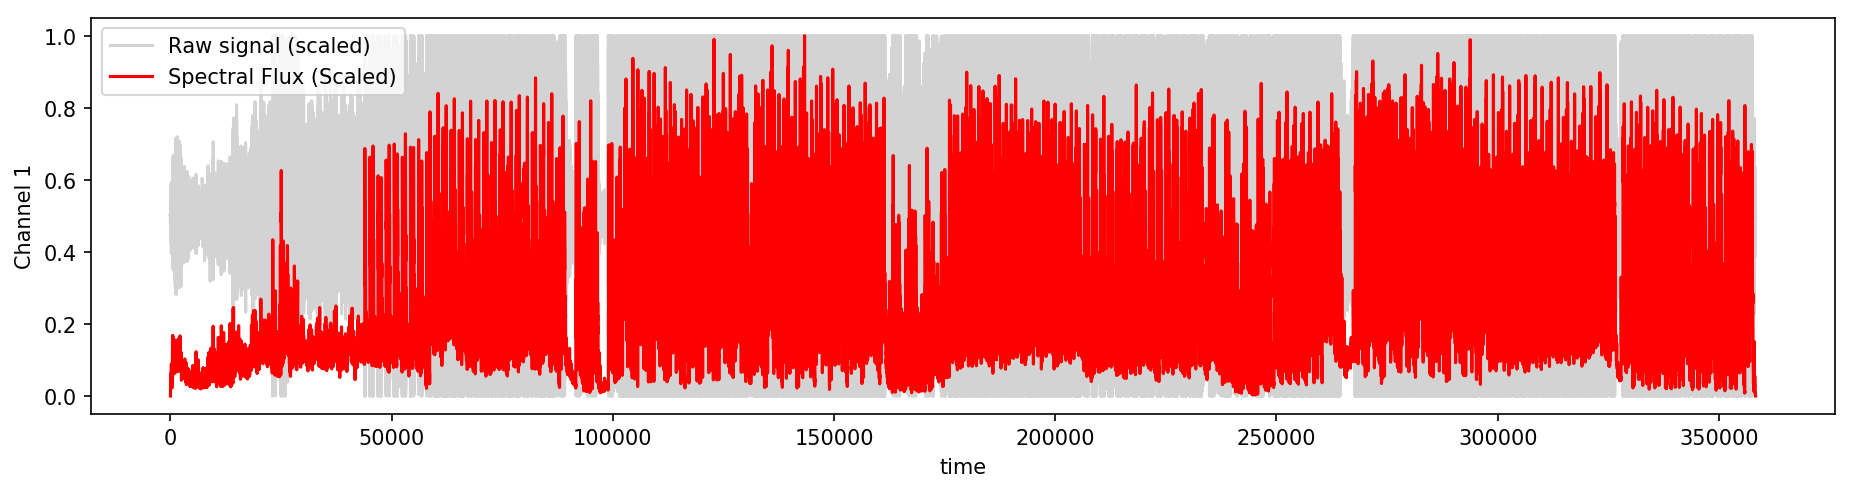

In [17]:
sf, ts = sndprcfunc.spectral_flux(sound_files[genre_ex]["wavedata"][0], 1024, sound_files[genre_ex]["samplerate"][0])
sndprcfunc.show_feature_superimposed(sound_files, 0, genre_ex, sf, ts, 'Spectral Flux (Scaled)');

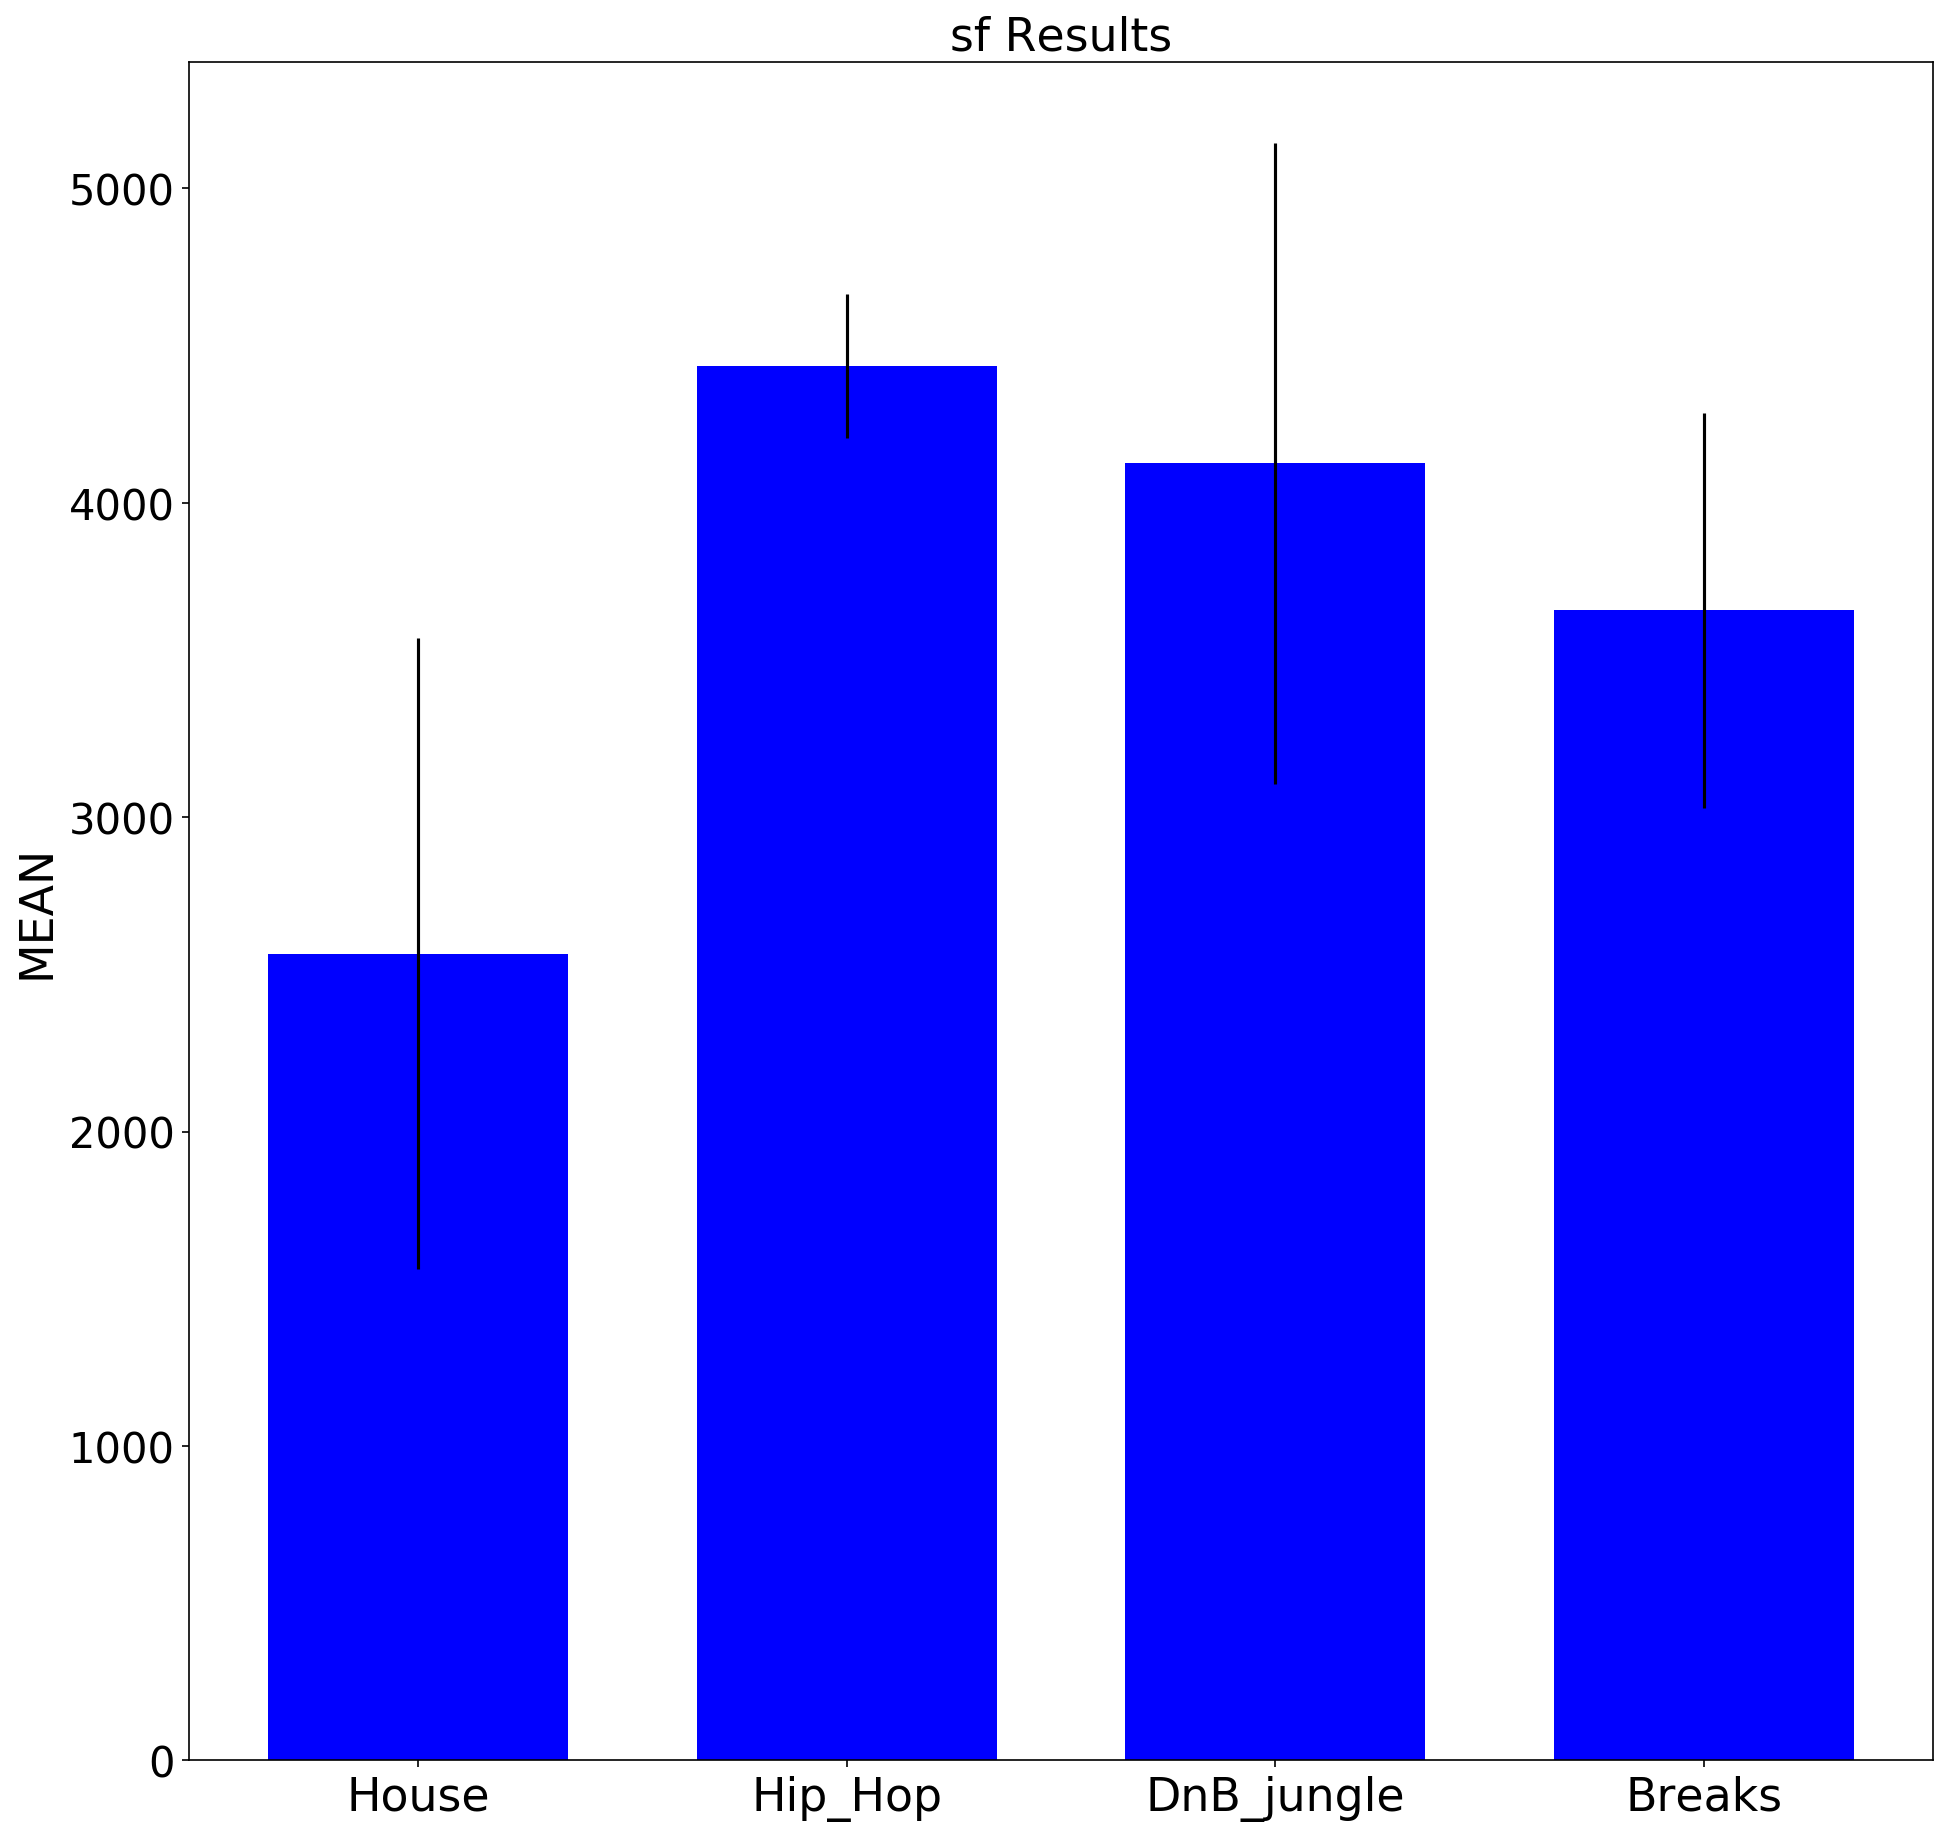

In [18]:
# calculate spectral flux for the collection
for genre in sound_files.keys():
    sf_temp = []
    for i in range(0, len(sound_files[genre]["wavedata"])):
        sf_temp.append(sndprcfunc.spectral_flux(sound_files[genre]["wavedata"][i], 2048, sound_files[genre]["samplerate"][i], False))
    sound_files[genre]["sf"] = sf_temp

sndprcfunc.plot_comparison(sound_files, "sf")

# Psychoaccoustical Features

# Mel-Frequency Cepstral Coefficients (MFCC)

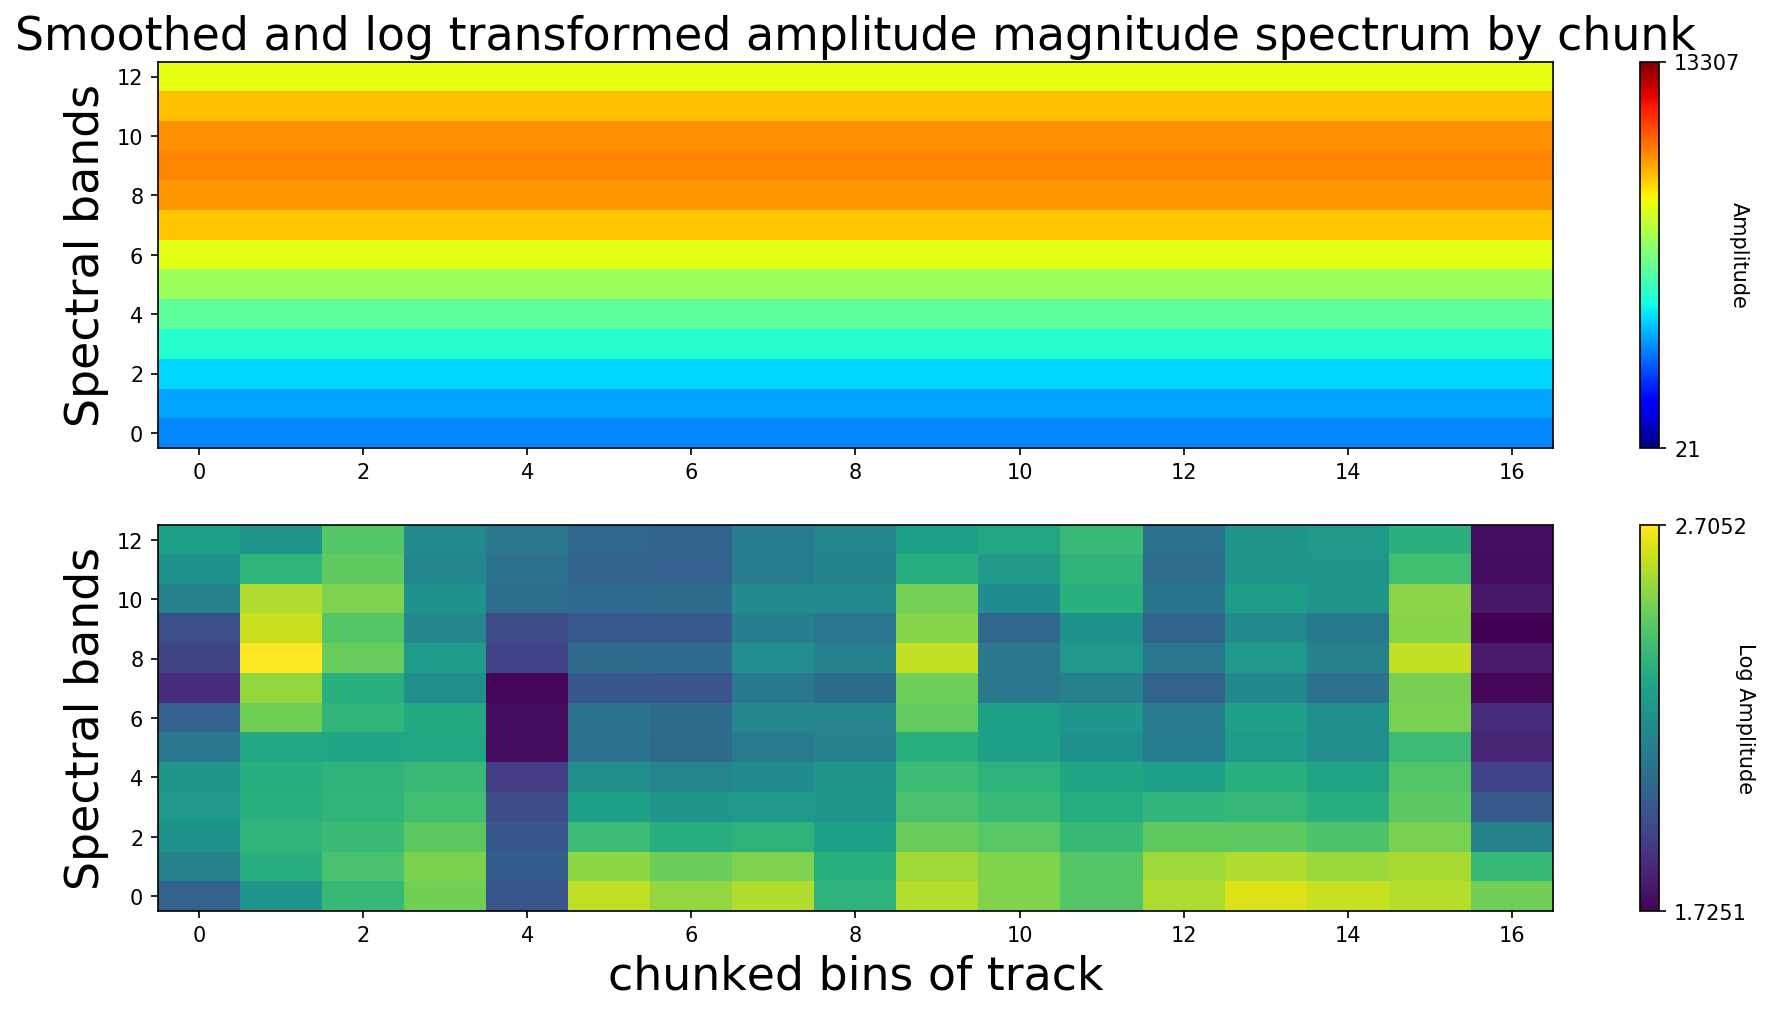

In [19]:
MFCCs_1, mspec_1, spec_1 = sndprcfunc.get_MFCCs_type_1(sound_files[genre_ex]["wavedata"][0], sound_files[genre_ex]["samplerate"][0], True)
sndprcfunc.plot_magnitude_spectrum(spec_1, mspec_1)


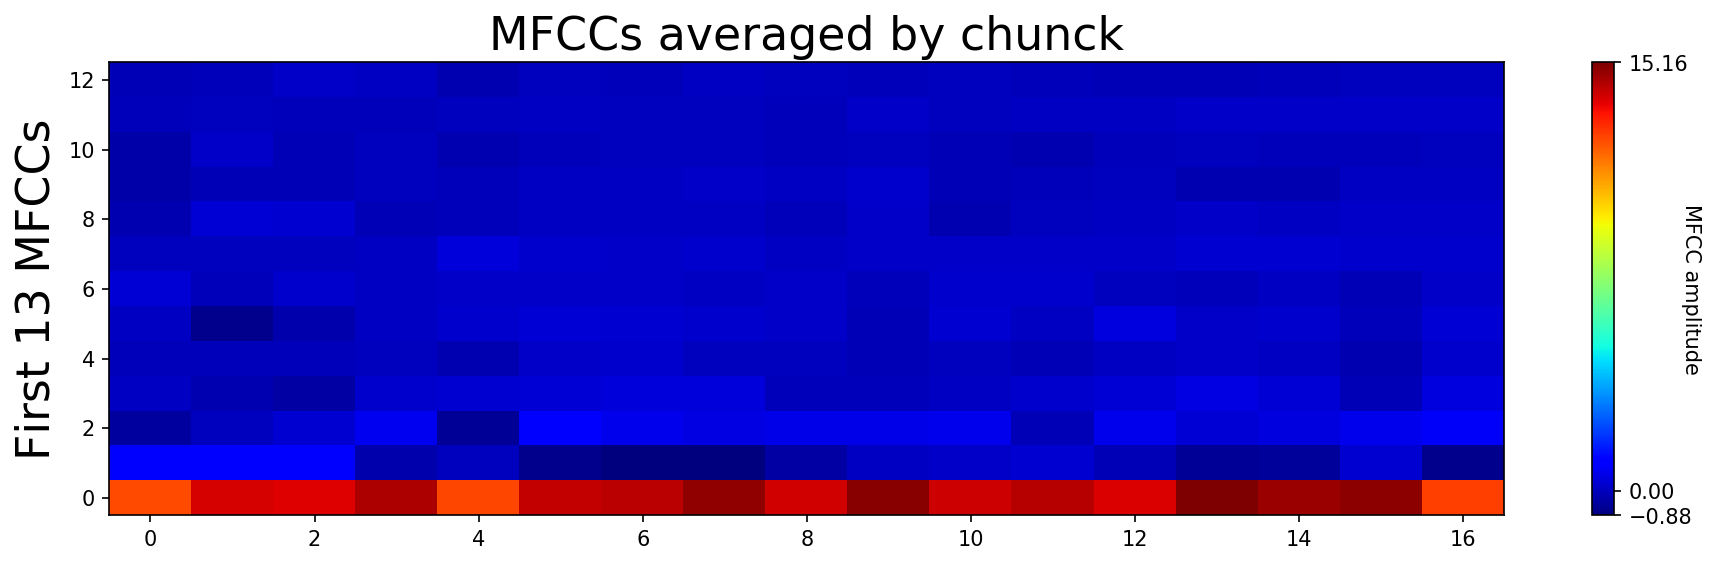

In [20]:
sndprcfunc.plot_mfccs(MFCCs_1)

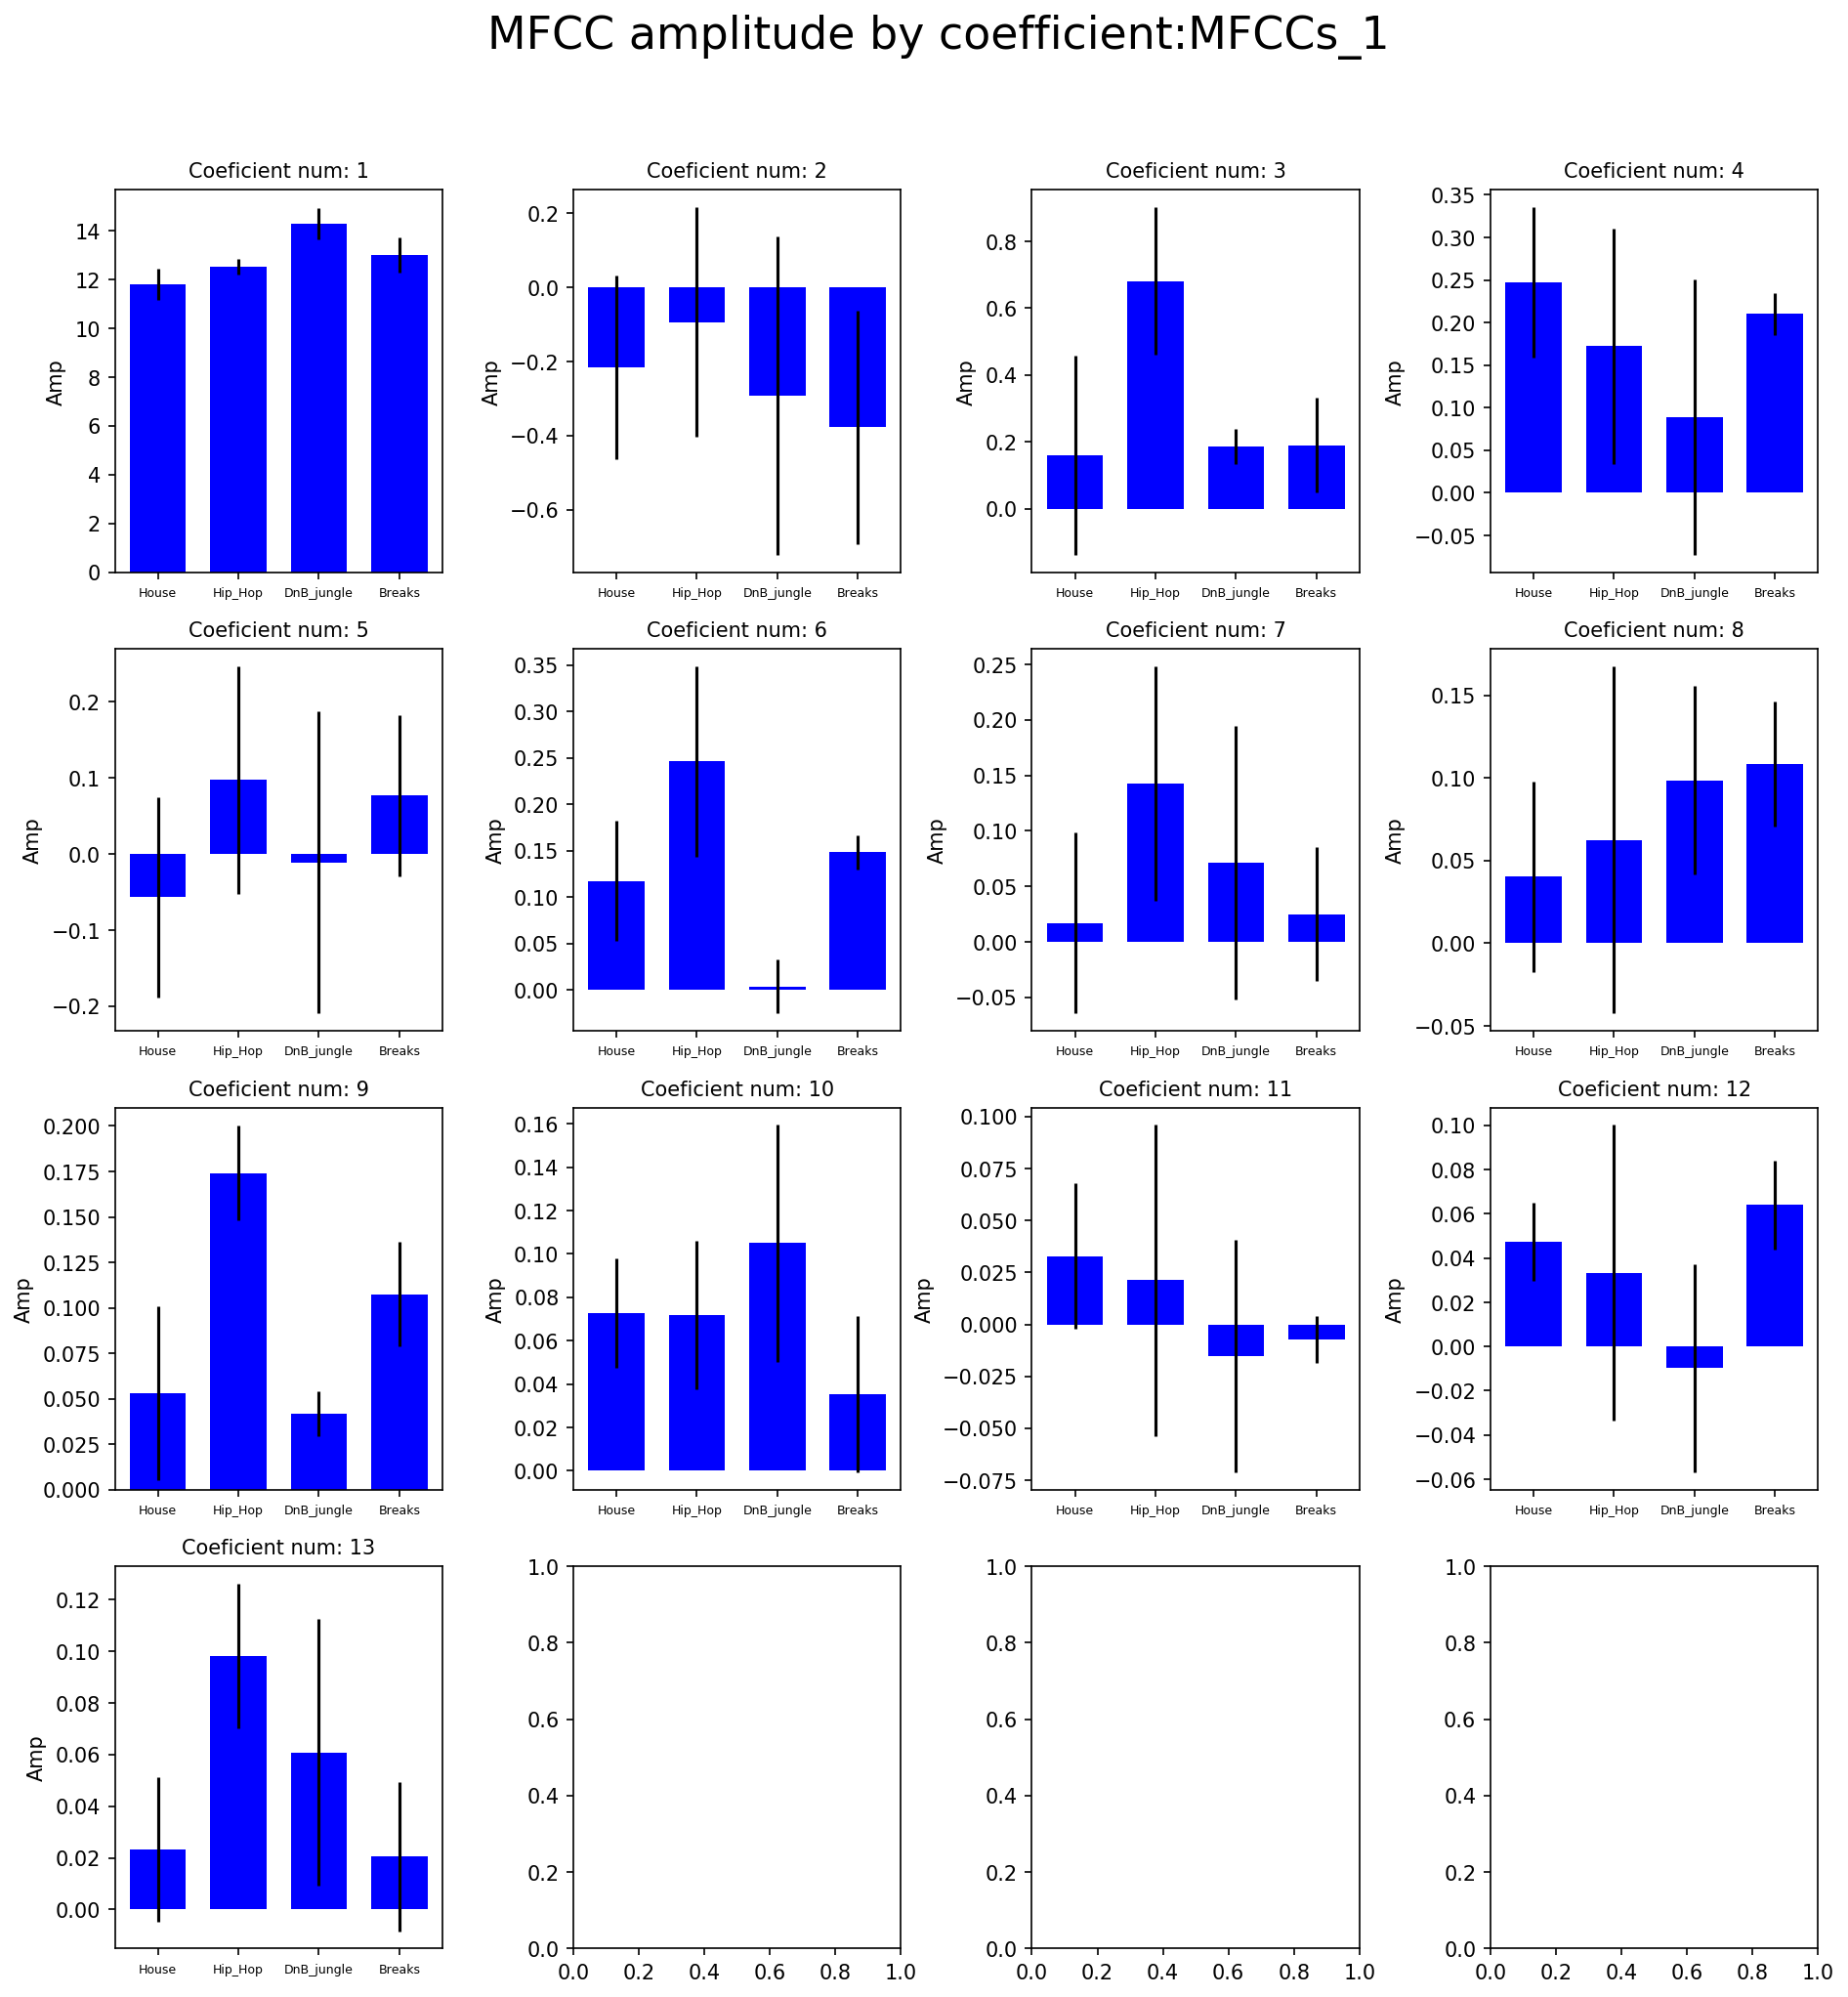

In [21]:
for genre in sound_files.keys():
    MFCCs_1_temp = []
    for i in range(0, len(sound_files[genre]["wavedata"])):
        MFCCs_1, mspec_1 = sndprcfunc.get_MFCCs_type_1(sound_files[genre]["wavedata"][i], sound_files[genre]["samplerate"][i])
        MFCCs_1_temp.append(np.mean(MFCCs_1, axis=0))
    sound_files[genre]["MFCCs_1"] = MFCCs_1_temp

sndprcfunc.plot_cross_group_MFCCs(sound_files, "MFCCs_1")

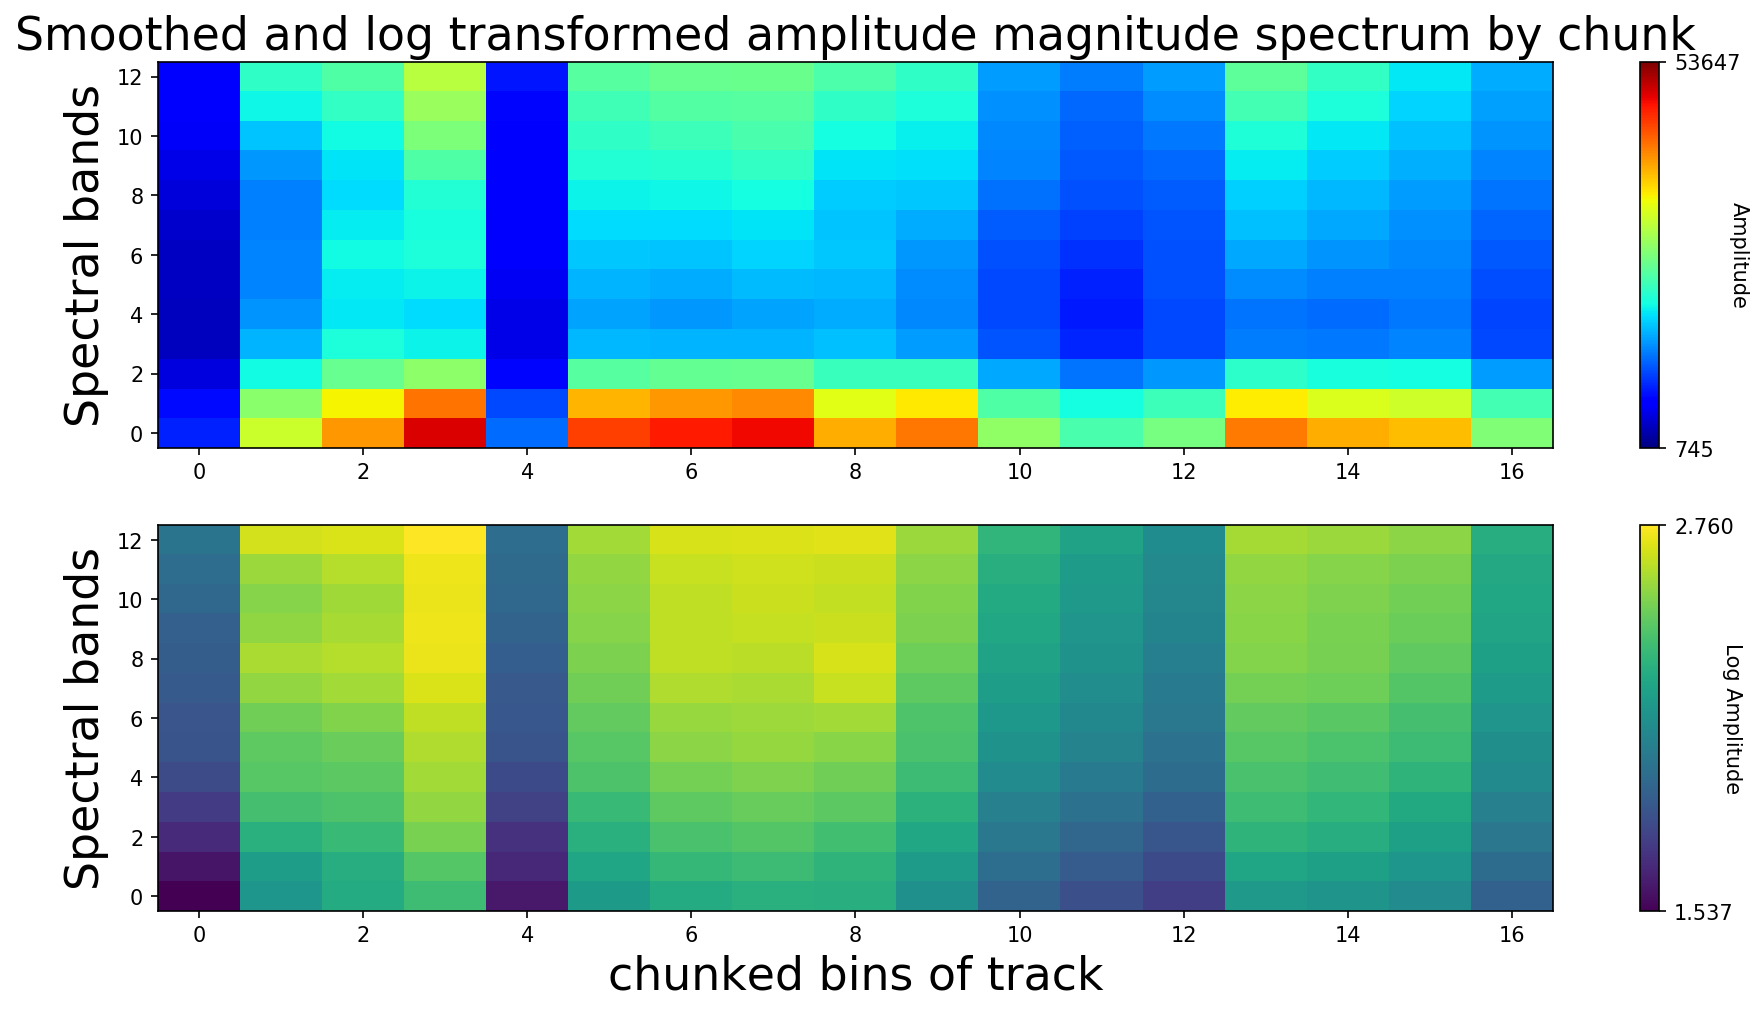

In [22]:
MFCCs_2, mspec_2, spec_2 = sndprcfunc.get_MFCCs_type_2(sound_files[genre_ex]["wavedata"][0], sound_files[genre_ex]["samplerate"][0], True)
sndprcfunc.plot_magnitude_spectrum(spec_2, mspec_2)

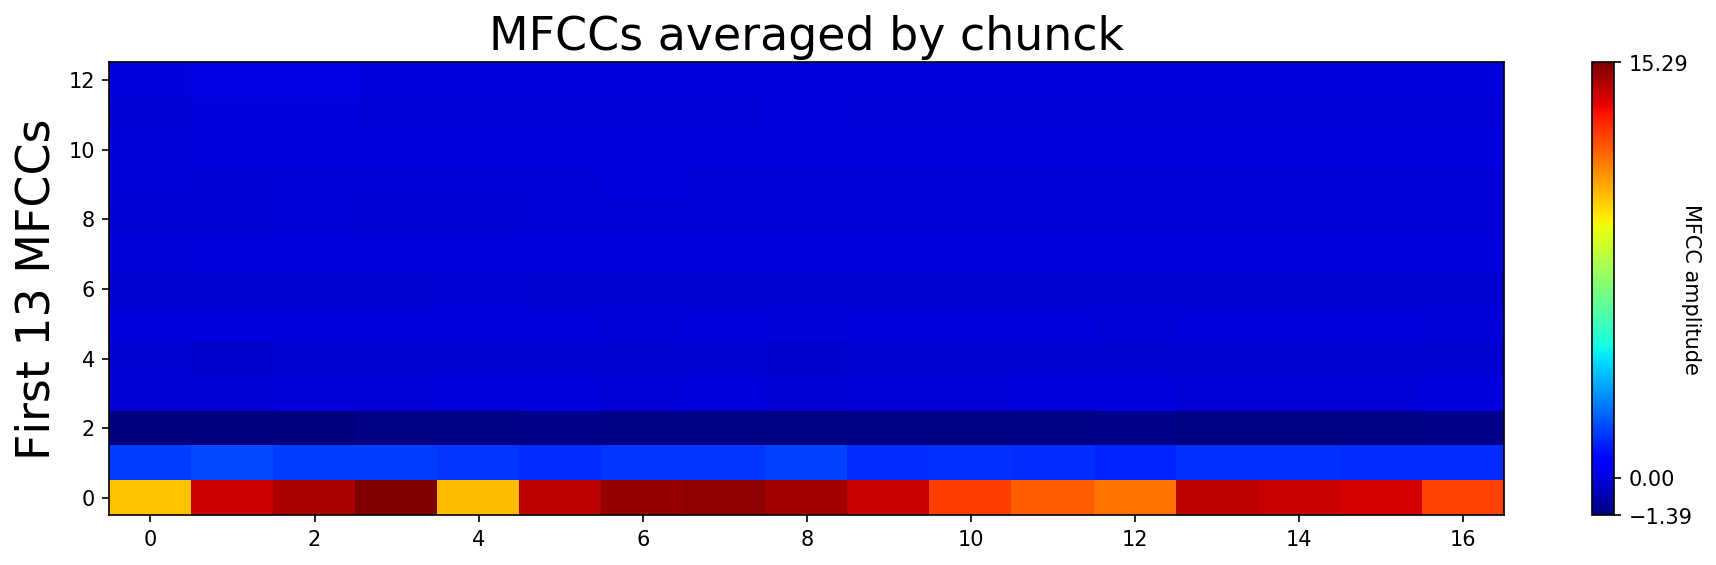

In [23]:
sndprcfunc.plot_mfccs(MFCCs_2)

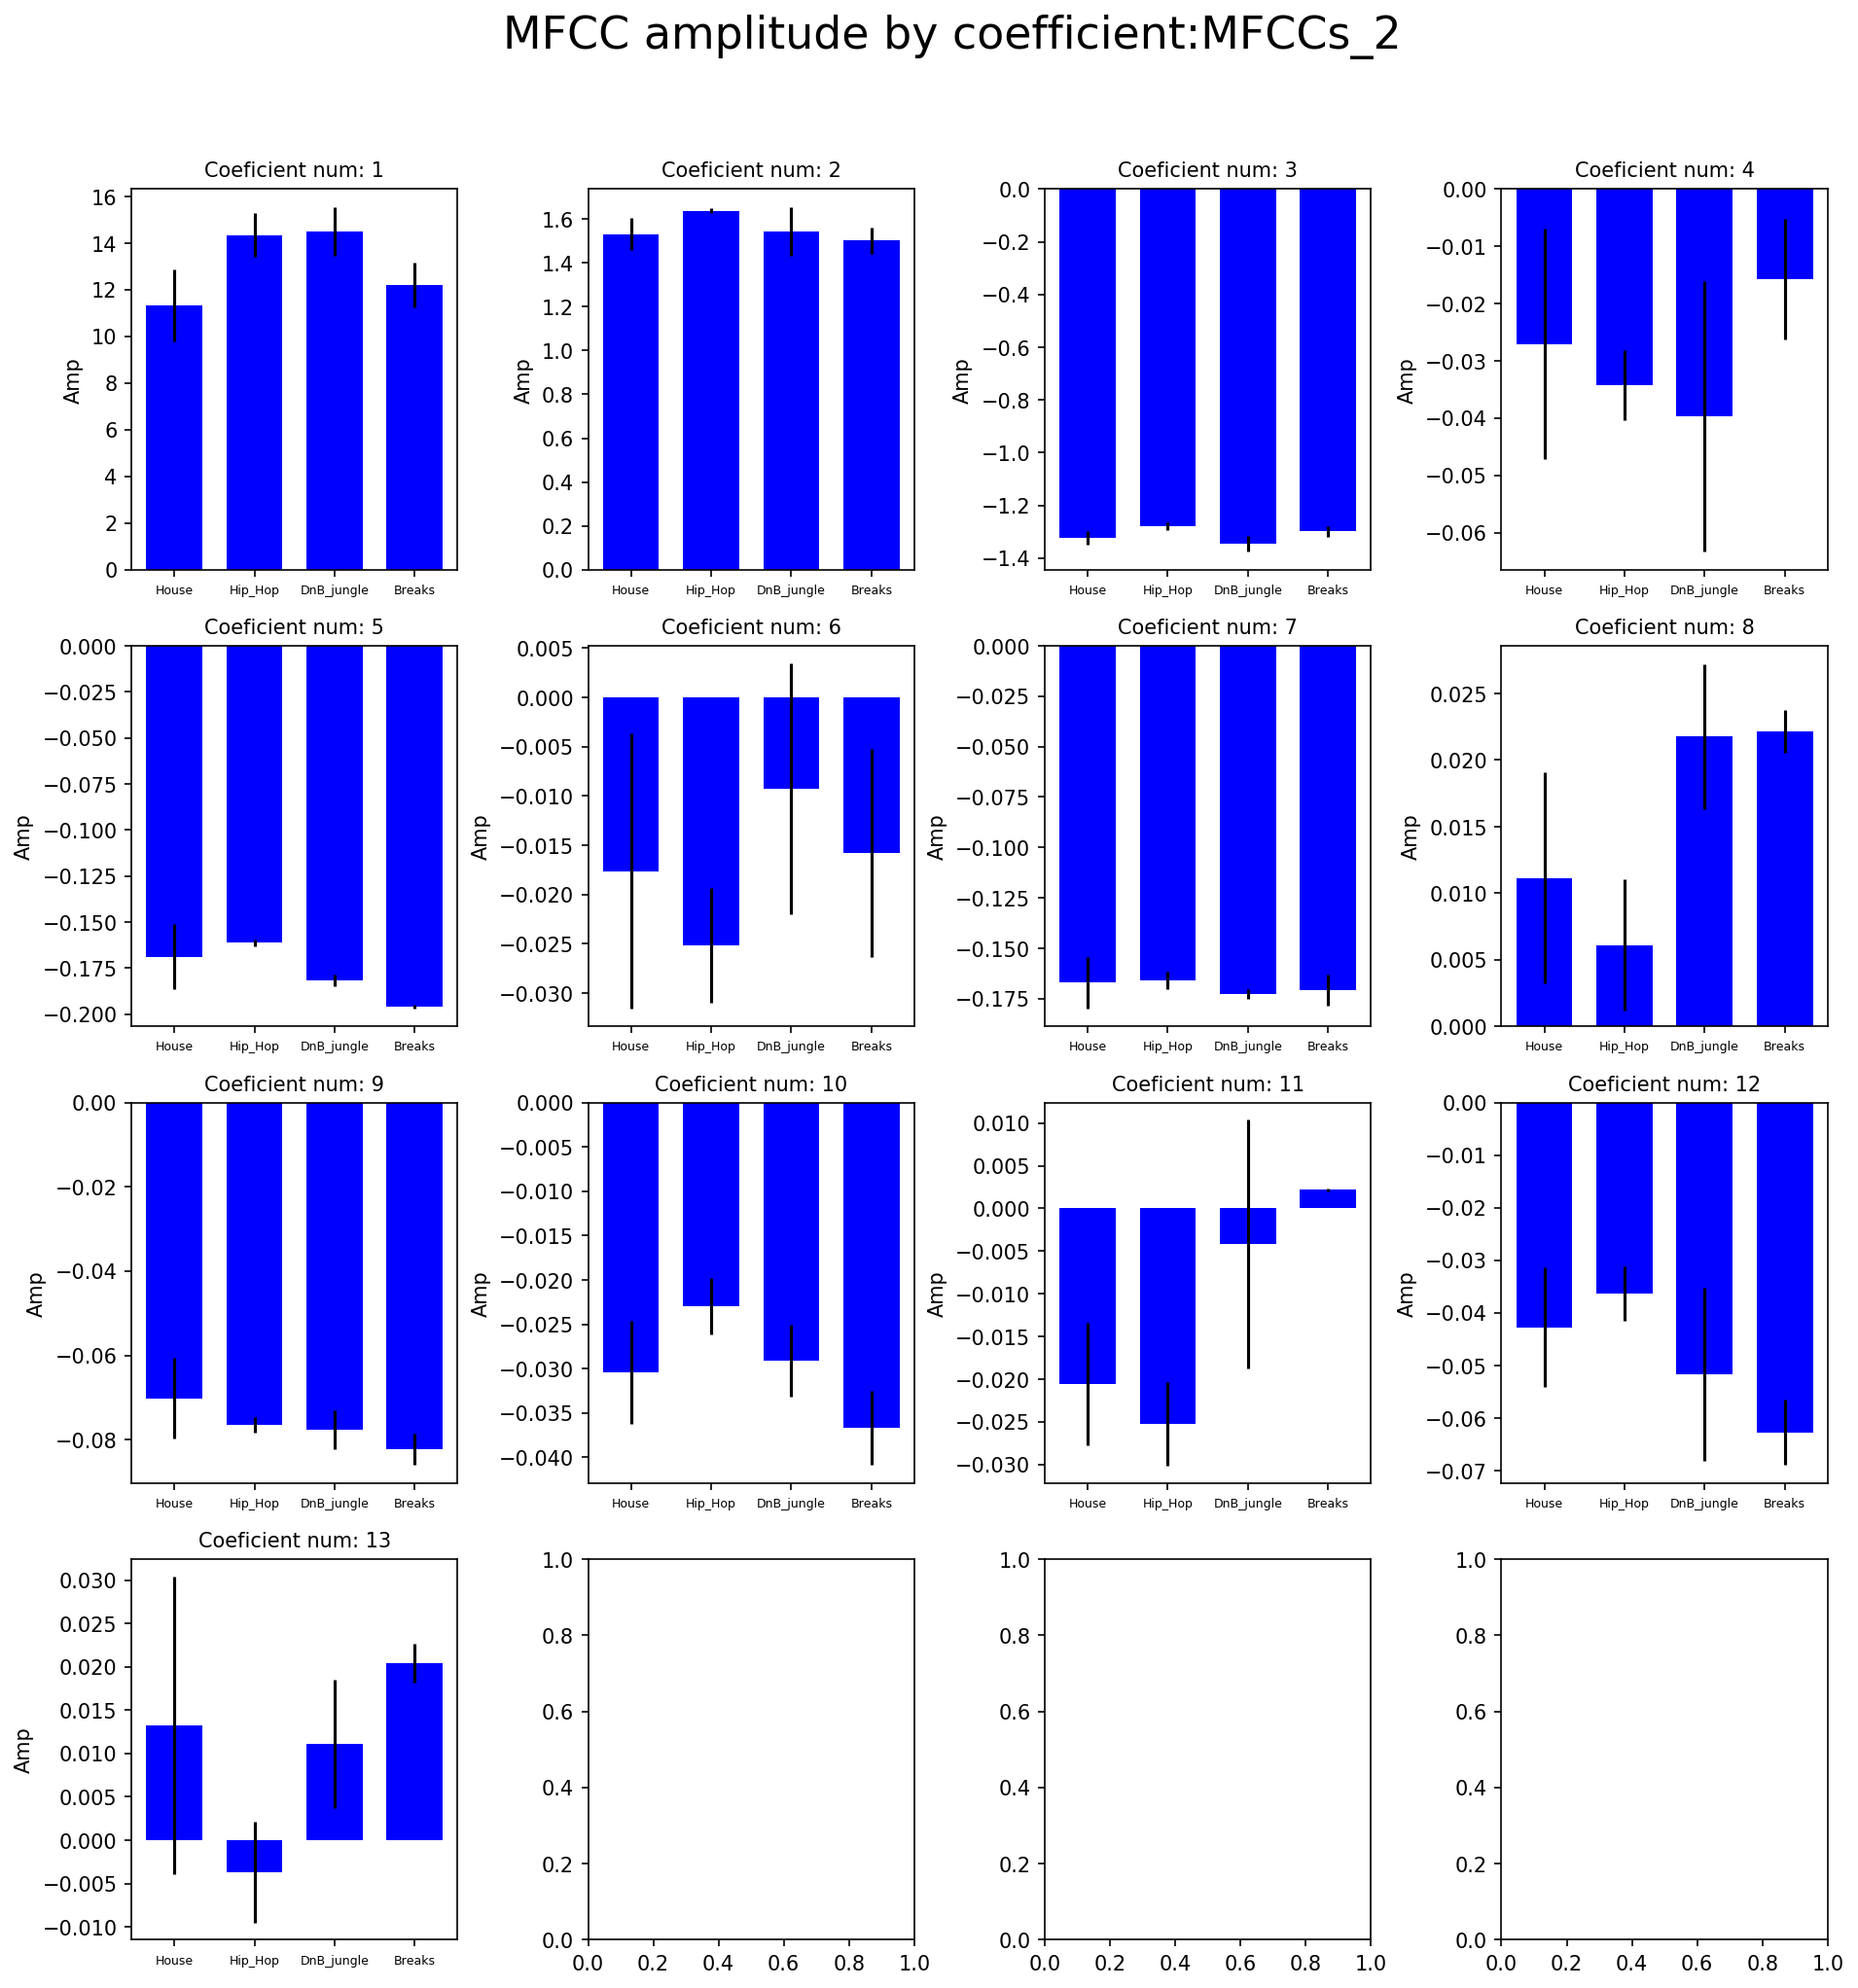

In [24]:
for genre in sound_files.keys():
    MFCCs_2_temp = []
    for i in range(0, len(sound_files[genre]["wavedata"])):
        MFCCs_2, mspec_2 = sndprcfunc.get_MFCCs_type_2(sound_files[genre]["wavedata"][i], sound_files[genre]["samplerate"][i])
        MFCCs_2_temp.append(np.mean(MFCCs_2, axis=0))
    sound_files[genre]["MFCCs_2"] = MFCCs_2_temp

sndprcfunc.plot_cross_group_MFCCs(sound_files, "MFCCs_2")

# Statistical Spectrum Descriptors - describe the rhythmic content of a piece of audio by computing the following statistical moments on the Sonogram values of each of the critical bands: mean, median, variance, skewness, kurtosis, min- and max-value

/home/markhyphen/Dropbox/DS_Work-Dropbox/GH_Repos/Metis_projects/Music_Genre_Classification-Metis_Project_3_McNulty/sound_processing_functions.py:611: RuntimeWarning: divide by zero encountered in true_divide
  fluct_curve = 1 / (mod_freq_axis / 4 + 4 / mod_freq_axis)
/home/markhyphen/Dropbox/DS_Work-Dropbox/GH_Repos/Metis_projects/Music_Genre_Classification-Metis_Project_3_McNulty/sound_processing_functions.py:634: ComplexWarning: Casting complex values to real discards the imaginary part
  spectrogr[:, j] = periodogram(x=wavsegment[idx], win=w)


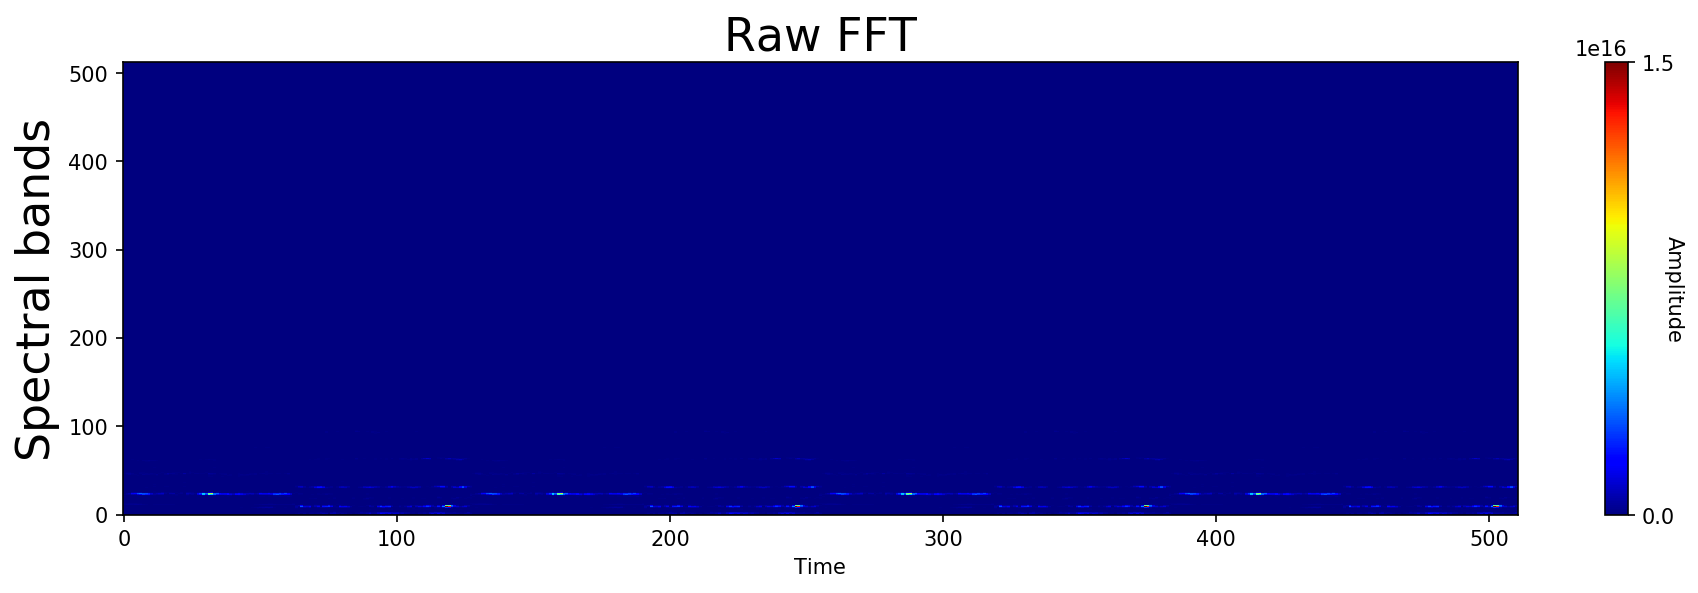

In [25]:
ssd, rh, rp, spec_raw, spec_bark, spec_masked, spec_decible, spec_phon, spec_sone = \
    sndprcfunc.do_rythm_analysis(sound_files[genre_ex]["wavedata"][0], sound_files[genre_ex]["samplerate"][0], True)
sndprcfunc.plot_spectrogram(spec_raw, 'Raw FFT')


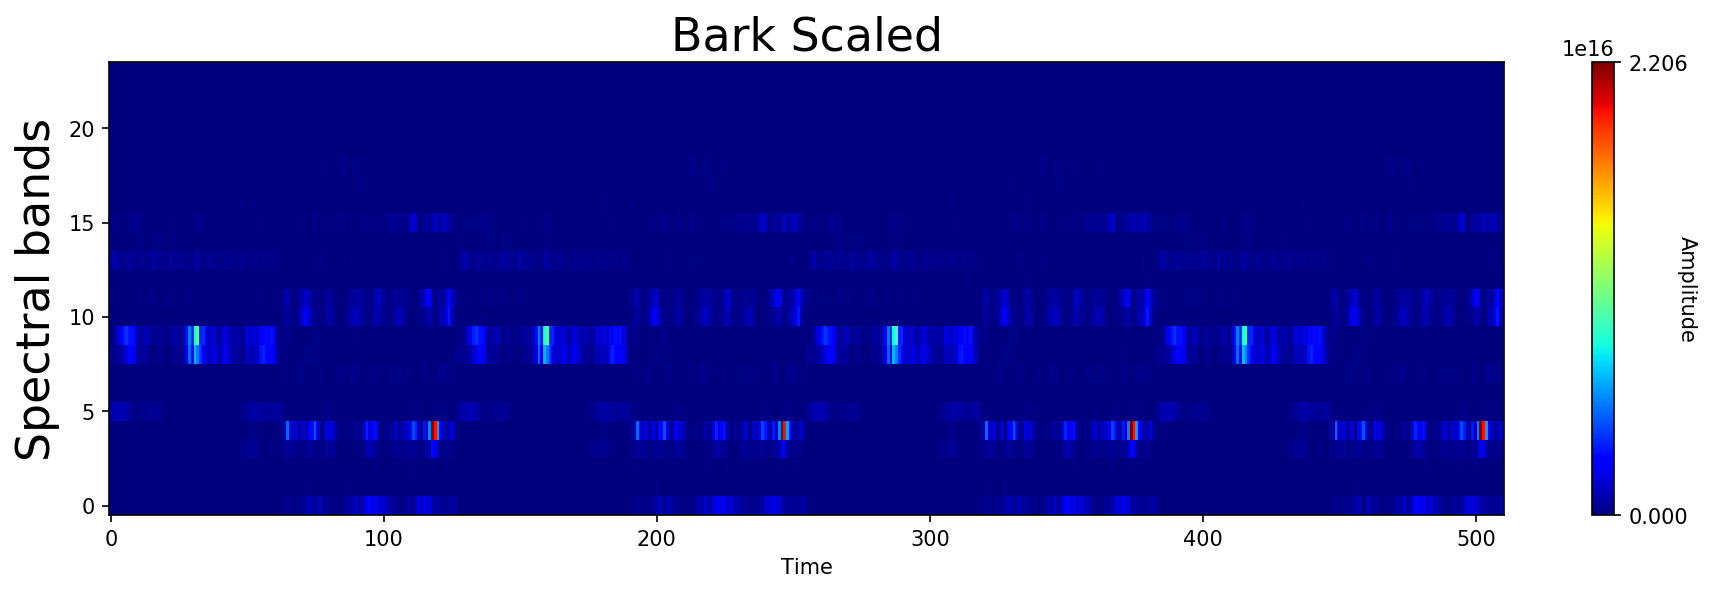

In [26]:
sndprcfunc.plot_spectrogram(spec_bark, 'Bark Scaled')

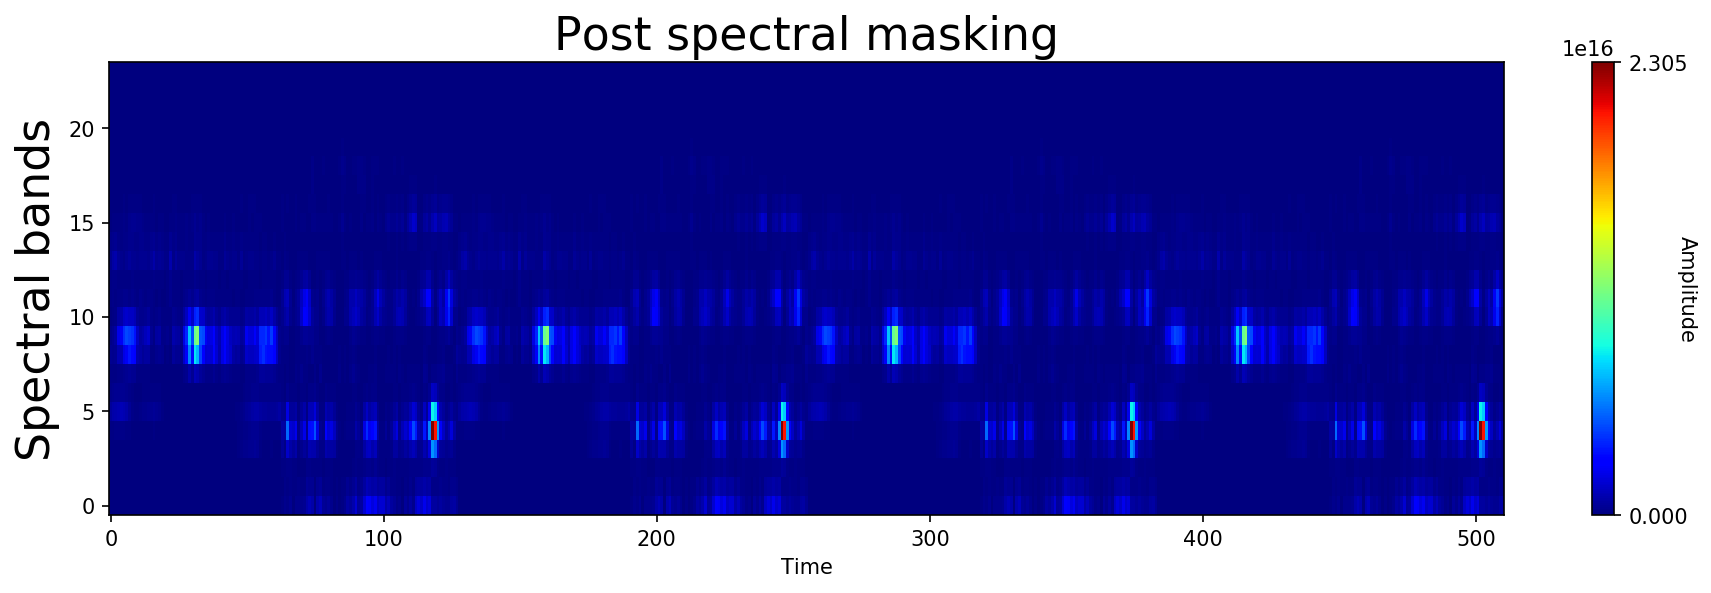

In [27]:
sndprcfunc.plot_spectrogram(spec_masked, 'Post spectral masking')

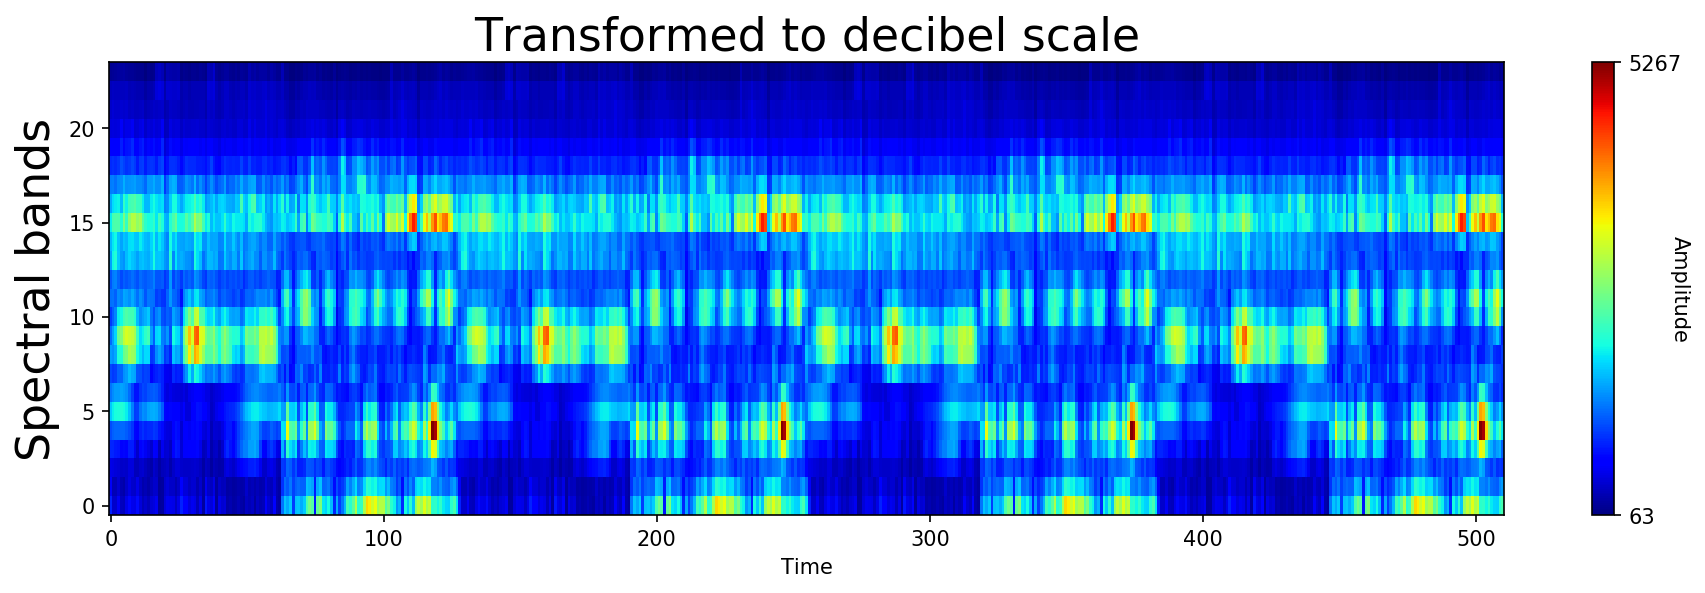

In [28]:
sndprcfunc.plot_spectrogram(spec_decible, 'Transformed to decibel scale')


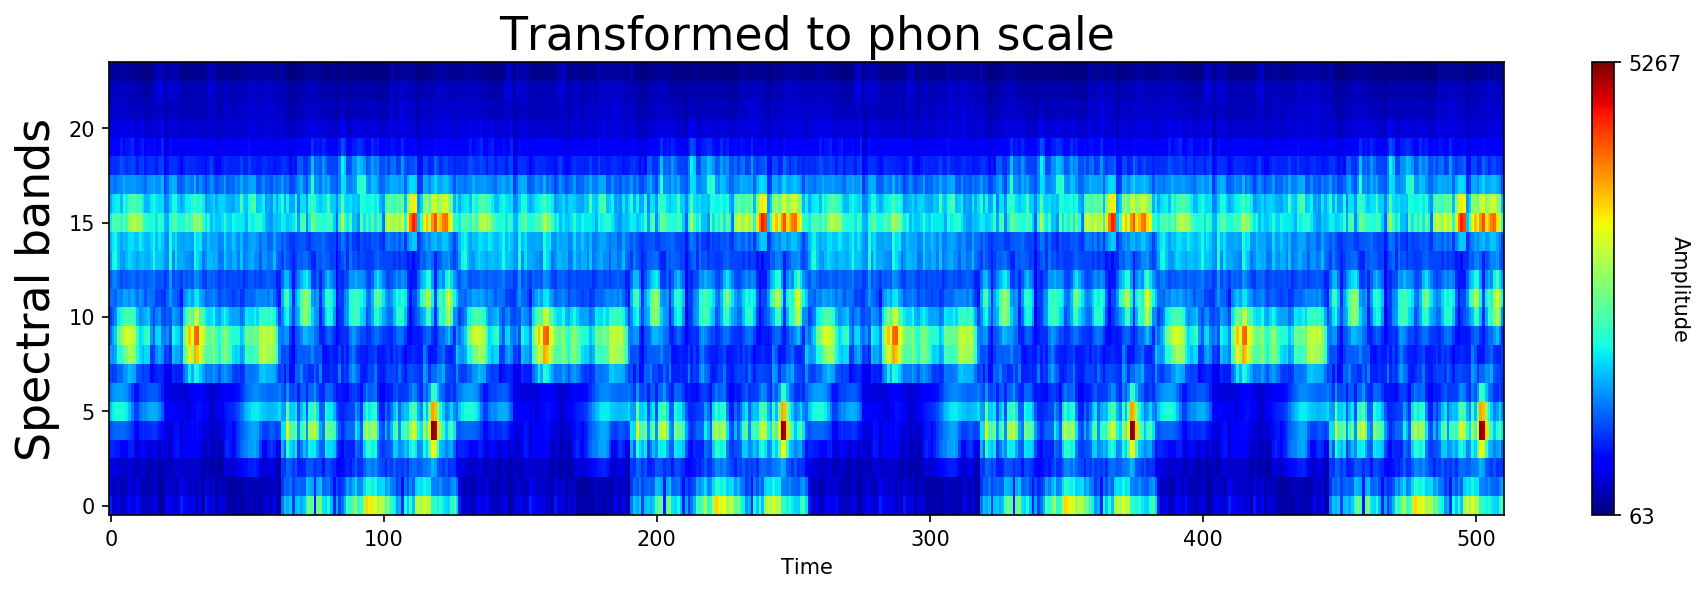

In [29]:
sndprcfunc.plot_spectrogram(spec_phon, 'Transformed to phon scale')

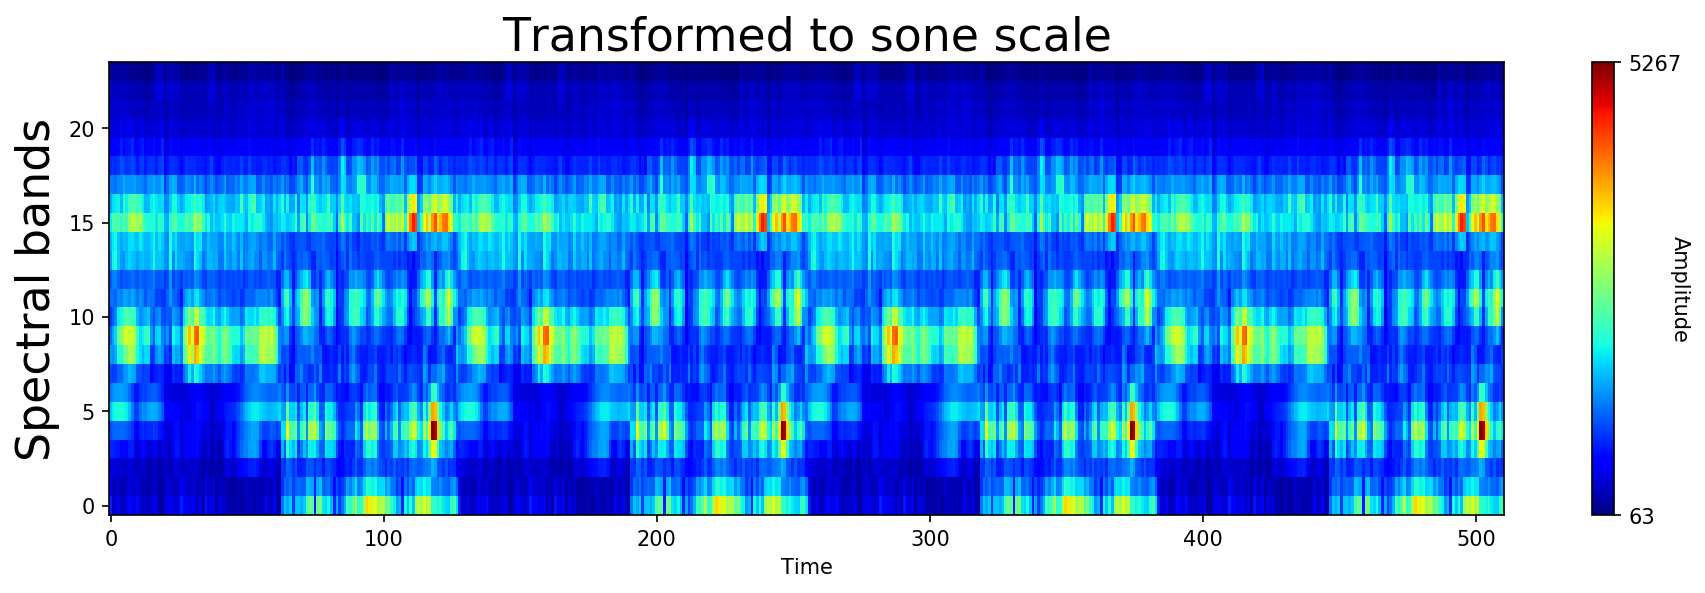

In [30]:
sndprcfunc.plot_spectrogram(spec_sone, 'Transformed to sone scale')

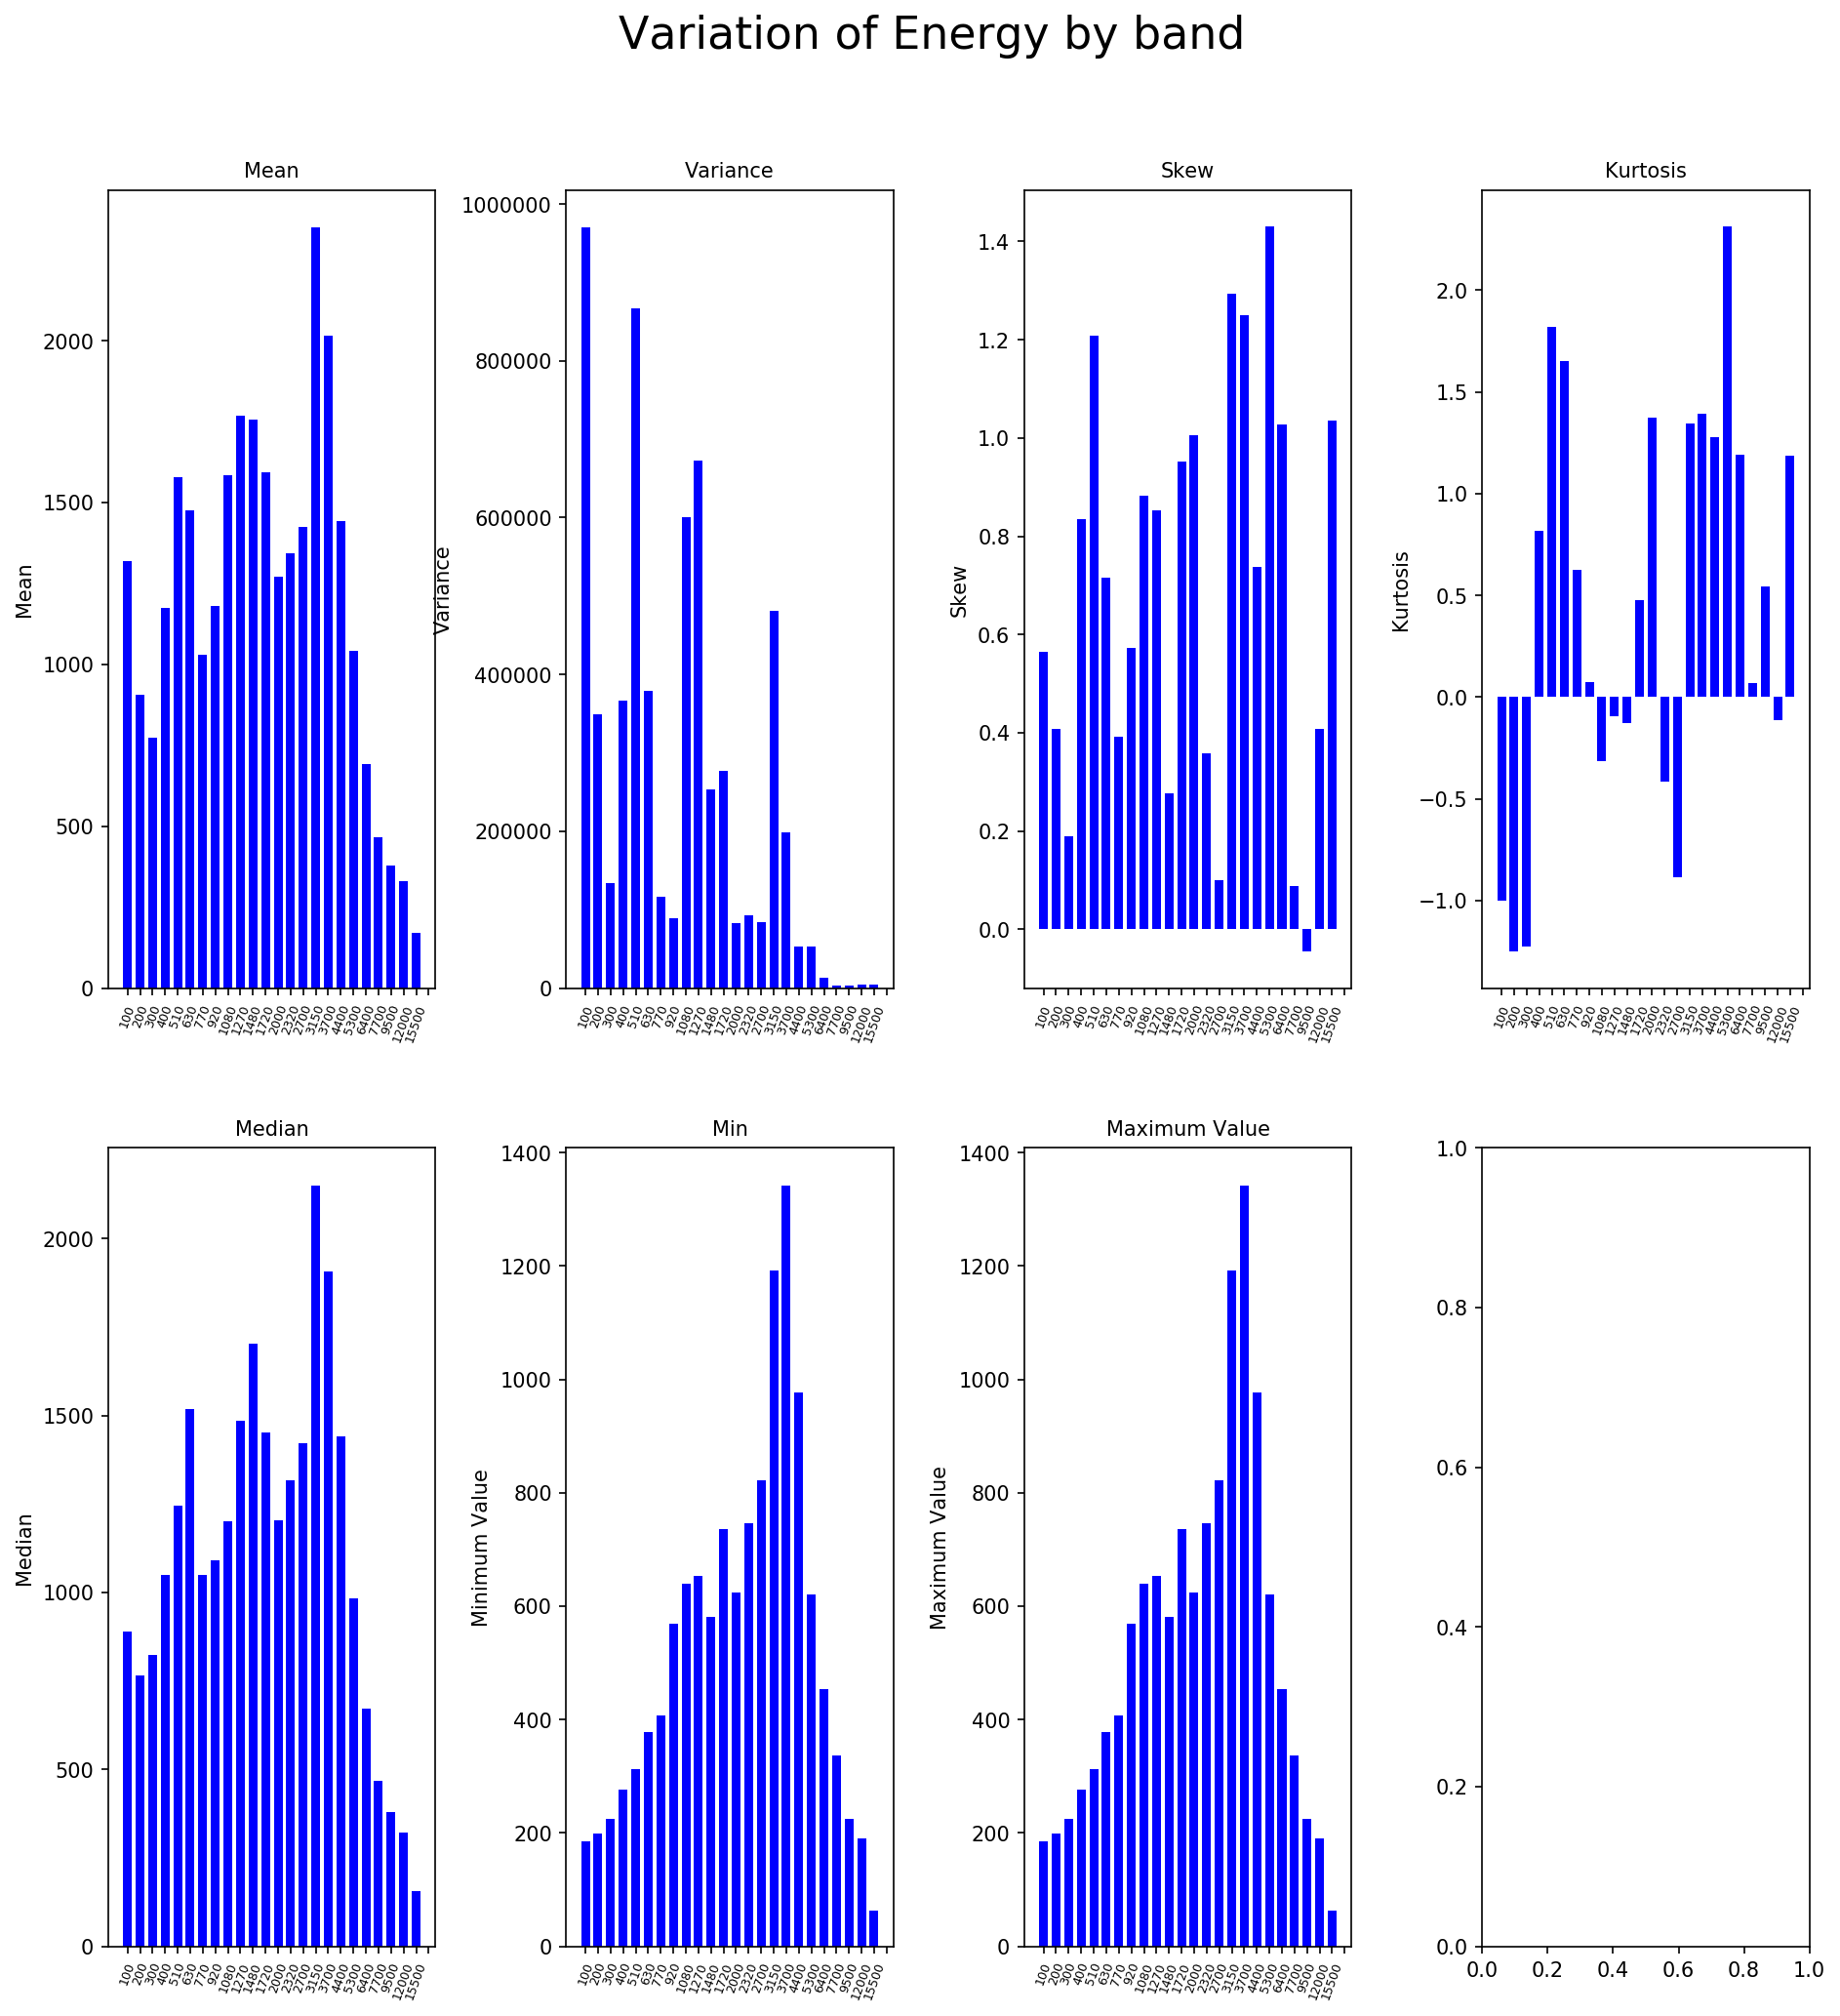

In [31]:
sndprcfunc.plot_SSD_components(ssd)

# Rhythm Patterns

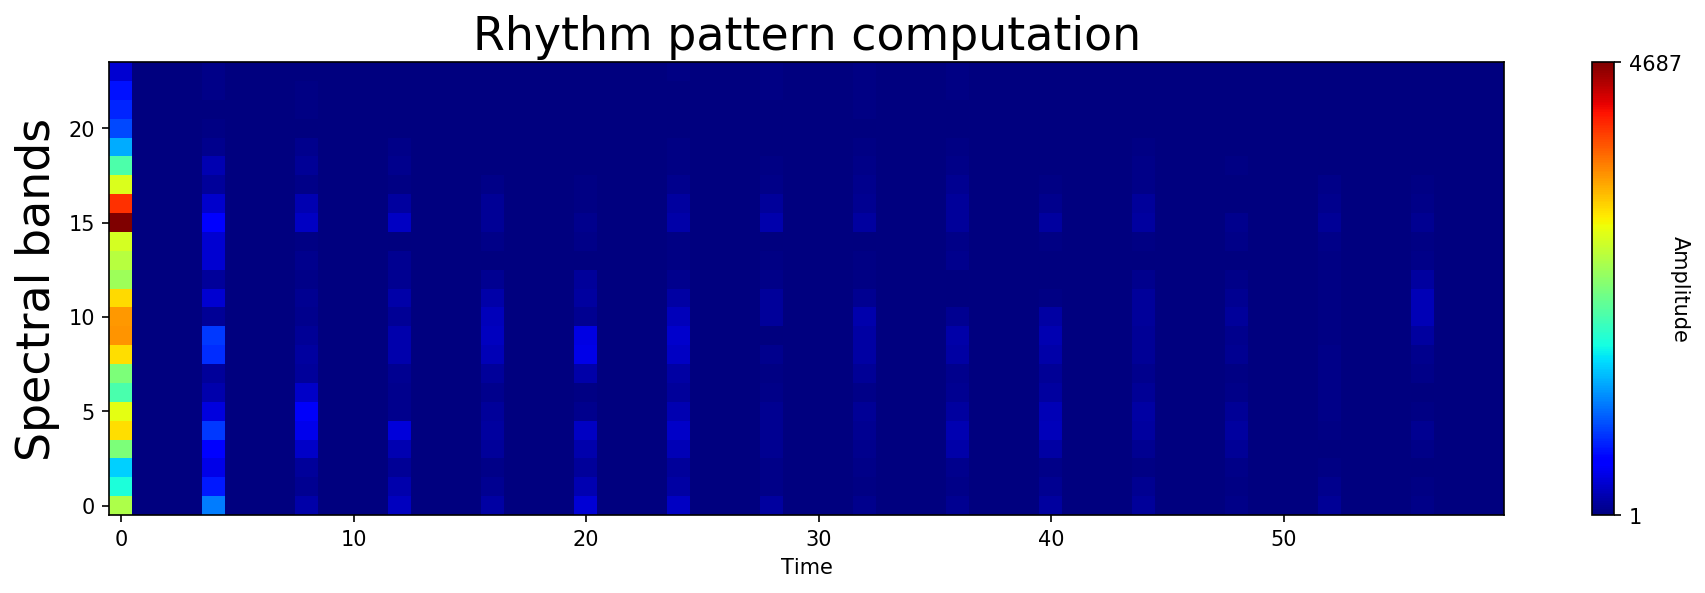

In [32]:
sndprcfunc.plot_spectrogram(rp, 'Rhythm pattern computation')

# Rhythm Pattern histogram

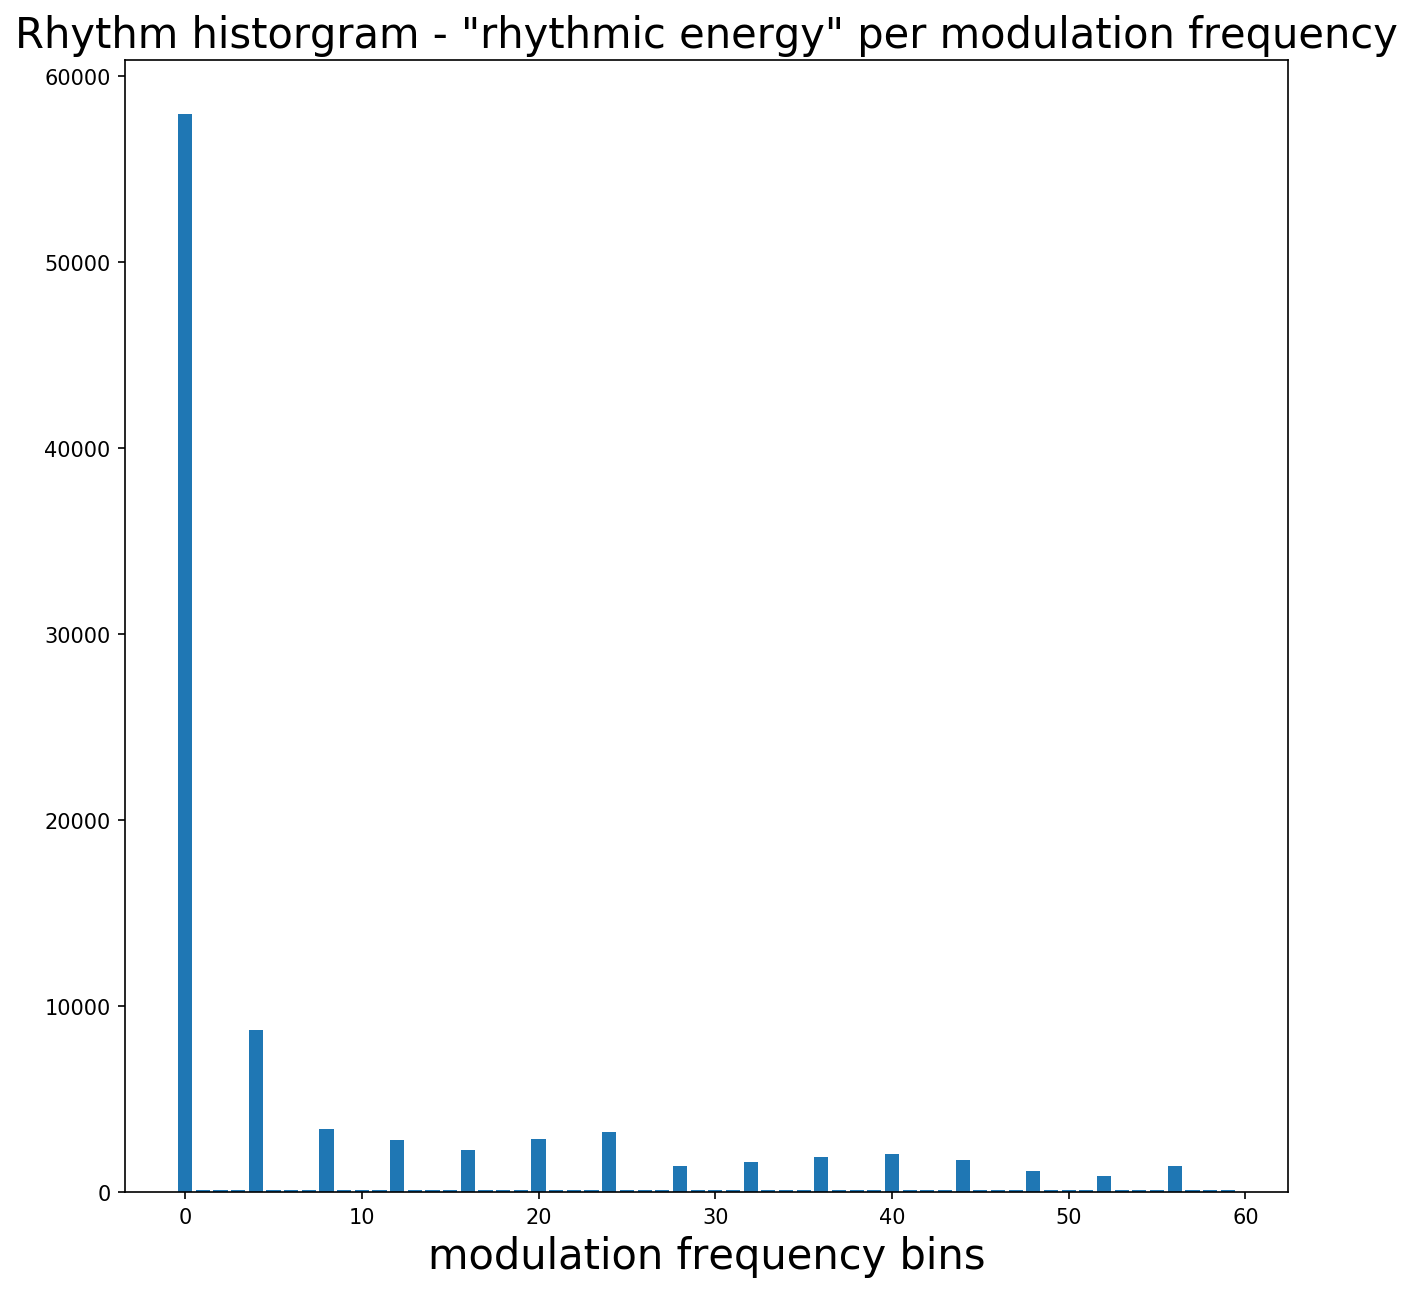

In [33]:
sndprcfunc.plot_rhythm_historgram(rh)